# __Trendanalyse des Bitcoinkurses im Zeitraum von 01.01.2014 bis 01.05.2019 mithilfe von Sentimentdaten von Twitternachrichten__

In [20]:
#https://docs.python.org/3/library/math.html
import math

#https://numpy.org/doc/stable/reference/
import numpy as np

#https://pandas.pydata.org/docs/reference/index.html
import pandas as pd

#https://seaborn.pydata.org/api.html
import seaborn as sns

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

#http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/
from mlxtend.plotting import scatterplotmatrix,plot_decision_regions,plot_learning_curves

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
from sklearn.calibration import CalibratedClassifierCV

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

#https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
from sklearn.naive_bayes import GaussianNB

#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
import lightgbm as lgb

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score,KFold,cross_validate

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer,MaxAbsScaler,PolynomialFeatures,QuantileTransformer,Normalizer

#https://github.com/mrabarnett/mrab-regex
import re

#https://docs.python.org/3/library/datetime.html
import datetime

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html?highlight=time#sklearn.model_selection.TimeSeriesSplit
from time import time

#https://docs.python.org/3/library/datetime.html
from datetime import datetime, timedelta, timezone

#https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.SVG
from IPython.display import SVG

#https://graphviz.readthedocs.io/en/stable/api.html#graphviz.Source
from graphviz import Source

#https://scikit-learn.org/stable/inspection.html
from sklearn.inspection import plot_partial_dependence, permutation_importance

#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

#https://shap.readthedocs.io/en/latest/
import shap

#https://docs.python.org/3/library/itertools.html
import itertools

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

#https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use("fivethirtyeight") #große Schriften und hoher Kontrast für eine bessere Lesbarkeit

from statsmodels.tsa.stattools import adfuller

#https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy.stats import reciprocal, uniform, norm, wilcoxon, spearmanr, t as t_dist, loguniform, gaussian_kde

#https://joblib.readthedocs.io/en/latest/
from joblib import Parallel, delayed, parallel_backend

#https://github.com/jmcarpenter2/swifter/blob/master/docs/documentation.md
import swifter

#https://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy.cluster import hierarchy

#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
from scipy.spatial.distance import squareform

from collections import defaultdict

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#pd.plotting.register_matplotlib_converters()

## Prerequisites

In [ ]:
import sys
!{sys.executable} -m pip install swifter==1.3.4
!{sys.executable} -m pip install shap==0.40.0
!{sys.executable} -m pip install seaborn==0.12.0
!{sys.executable} -m pip install scipy==1.9.1
!{sys.executable} -m pip install scikit-learn==1.1.2
!{sys.executable} -m pip install pandas==1.0.5
!{sys.executable} -m pip install numpy==1.18.5
!{sys.executable} -m pip install matplotlib==3.2.2
!{sys.executable} -m pip install lightgbm==3.3.2
!{sys.executable} -m pip install joblib==1.2.0
!{sys.executable} -m pip install ipython==7.16.1
!{sys.executable} -m pip install graphviz==0.15
!{sys.executable} -m pip install re==2.2.1
!{sys.executable} -m pip install mlxtend
!{sys.executable} -m pip install statsmodels

## 1. Data Understanding

## 1.1 Laden der Daten

### Bitcoin-Daten

In [3]:
#Laden der Binance Bitcoin Kursdaten
#https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv

df_bitcoin = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df_bitcoin = df_bitcoin.convert_dtypes()

In [4]:
#Unix Epoch in Datum umwandeln
df_bitcoin["date"] = df_bitcoin["Timestamp"].swifter.apply(lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [5]:
df_bitcoin = df_bitcoin.convert_dtypes()

In [6]:
#Wandle Datentyp von Close Time in Datetime
df_bitcoin = df_bitcoin.convert_dtypes()
df_bitcoin["date"] = pd.to_datetime(df_bitcoin['date'])

In [7]:
#Begrenze Datensatz auf den Zeitraum von 2014-01-01 00:00 - 2019-11-23 00:00
d_min = datetime(2014,1,1,0,0,0,0)
d_max = datetime(2019,11,23,0,0,0,0)
mask = (df_bitcoin.date >= d_min) & (df_bitcoin.date <= d_max)
df_bitcoin = df_bitcoin.loc[mask]

In [8]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3092409 entries, 1053608 to 4146016
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          Int64         
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   date               datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(7)
memory usage: 238.9 MB


In [9]:
df_bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
1053608,1388534400,732.00,732.00,732.00,732.00,4.599562,3366.879047,732.000000,2014-01-01 00:00:00
1053609,1388534460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:01:00
1053610,1388534520,732.01,732.75,729.01,729.01,1.138530,830.438062,729.394976,2014-01-01 00:02:00
1053611,1388534580,730.24,732.76,730.24,732.76,0.121000,88.596624,732.203507,2014-01-01 00:03:00
1053612,1388534640,732.76,734.00,732.76,734.00,52.120000,38251.836202,733.918576,2014-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...
4146012,1574466960,7287.45,7294.18,7277.89,7285.20,11.565735,84271.703678,7286.325054,2019-11-22 23:56:00
4146013,1574467020,7285.20,7290.72,7284.45,7287.59,1.241585,9049.249723,7288.463205,2019-11-22 23:57:00
4146014,1574467080,7290.41,7290.41,7281.21,7288.08,0.212376,1547.682548,7287.467528,2019-11-22 23:58:00
4146015,1574467140,7281.21,7289.86,7277.89,7285.85,1.918093,13969.284307,7282.901666,2019-11-22 23:59:00


### Twitter-Daten

In [10]:
#Lies Twitter Daten ein
df_tweets = pd.read_csv("twitter-sentiments.csv", sep=",",usecols=["date", "sentiment","likes","label"], parse_dates=['date'])
df_tweets = df_tweets.convert_dtypes()

## 1.2 Beschreibung der Daten

### 1.2.1 Bitcoins

In [11]:
print("Es gibt Daten im Zeitraum von ", df_bitcoin["date"].min(), " bis ", df_bitcoin["date"].max())

Es gibt Daten im Zeitraum von  2014-01-01 00:00:00  bis  2019-11-23 00:00:00


In [12]:
print(df_bitcoin.shape)

(3092409, 9)


In [13]:
print('Der Datensatz hat {} Zeilen und {} Spalten'.format(df_bitcoin.shape[0], df_bitcoin.shape[1]))

Der Datensatz hat 3092409 Zeilen und 9 Spalten


In [14]:
print('Im Einzelnen handelt es sich um folgende Spalten:')
for column in df_bitcoin.columns:
    print(column)

Im Einzelnen handelt es sich um folgende Spalten:
Timestamp
Open
High
Low
Close
Volume_(BTC)
Volume_(Currency)
Weighted_Price
date


* Timestamp: Die Unixzeit (Epoch-Time) zählt die vergangenen Sekunden seit Donnerstag, dem 1. Januar 1970, 00:00 Uhr UTC.
* Date: Das Anfangsdatum der Zeitperiode, für den ein Kurs erfasst wurde. (UTC)
* Open: Der Eröffnungskurs am Anfang der jeweiligen Zeitperiode in US-Dollar.
* High: Der Höchstkurs während der jeweiligen Zeitperiode in US-Dollar.
* Low: Der Tiefstkurs während der jeweiligen Zeitperiode in US-Dollar.
* Close: Der Schlusskurs während der jeweiligen Zeitperiode in US-Dollar.
* Volume_(BTC): Das gehandelte Volumen in Bitcoin-Einheiten während der jeweiligen Zeitperiode.
* Volume_(Currency): Das gehandelte Volumen in US-Dollar während der jeweiligen Zeitperiode.
* Weigthed_Price: VWAP (Volume Weighted Average Price). Gibt das Verhältnis zwischen dem gehandelten Wert und Volumen in der Zeitperiode an.

In [15]:
#Auszug der ersten 5 Zeilen des Datensatzes
df_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
1053608,1388534400,732.00,732.00,732.00,732.00,4.599562,3366.879047,732.000000,2014-01-01 00:00:00
1053609,1388534460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:01:00
1053610,1388534520,732.01,732.75,729.01,729.01,1.138530,830.438062,729.394976,2014-01-01 00:02:00
1053611,1388534580,730.24,732.76,730.24,732.76,0.121000,88.596624,732.203507,2014-01-01 00:03:00
1053612,1388534640,732.76,734.00,732.76,734.00,52.120000,38251.836202,733.918576,2014-01-01 00:04:00


In [16]:
#Ausgabe der einzelnen Spalten und der Datentypen
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3092409 entries, 1053608 to 4146016
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          Int64         
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   date               datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(7)
memory usage: 238.9 MB


In [17]:
#Ausgabe einiger Statistiken des Datensatzes
df_bitcoin.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.092409e+06,2.565025e+06,2.565025e+06,2.565025e+06,2.565025e+06,2.565025e+06,2.565025e+06,2.565025e+06
mean,1.481628e+09,3.790512e+03,3.793314e+03,3.787418e+03,3.790437e+03,9.343175e+00,3.099223e+04,3.790366e+03
std,5.365801e+07,3.959531e+03,3.963241e+03,3.955327e+03,3.959418e+03,3.046425e+01,1.049234e+05,3.959324e+03
min,1.388534e+09,1.530500e+02,1.610000e+02,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,1.566545e+02
25%,1.435309e+09,4.496100e+02,4.499000e+02,4.492900e+02,4.496500e+02,3.775383e-01,4.290040e+02,4.496100e+02
50%,1.481695e+09,1.774800e+03,1.776240e+03,1.773570e+03,1.774840e+03,1.955012e+00,3.168566e+03,1.774639e+03
75%,1.528081e+09,6.710300e+03,6.713730e+03,6.707360e+03,6.710230e+03,7.452916e+00,1.984518e+04,6.710171e+03
max,1.574467e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


In [18]:
#Sortierung nach 'date'
df_bitcoin.sort_values(by=['date'], inplace=True, ignore_index=True)

In [19]:
#Umbennen von Spalten. Die Klammer stört einige Python-Funktionen
df_bitcoin.rename(columns={"Volume_(BTC)": "Volume_BTC", "Volume_(Currency)": "Volume_USD"}, inplace=True)

In [20]:
df_bitcoin.set_index('date',inplace =True)

### 1.2.2 Tweets

In [21]:
print(df_tweets.shape)

(7578483, 4)


In [22]:
print('Der Datensatz hat {} Zeilen und {} Spalten'.format(df_tweets.shape[0], df_tweets.shape[1]))

Der Datensatz hat 7578483 Zeilen und 4 Spalten


In [23]:
print('Im Einzelnen handelt es sich um folgende Spalten:')
for column in df_tweets.columns:
    print(column)

Im Einzelnen handelt es sich um folgende Spalten:
date
sentiment
likes
label


* date: Das Datum des Tweets (Datumsformat in yyyy-mm-dd) in UTC
* likes: Die Anzahl der User, die den Tweet geliked haben.
* sentiment: Der Compound VADER Sentiment Score des Twittertexts. -1 steht dabie für äußerst schlecht und +1 für äußert gut. (Gleitkommazahl im Intervall von [-1,1])

In [24]:
#Auszug der ersten 5 Zeilen des Datensatzes
df_tweets.head()

,date,sentiment,likes,label
0,2019-07-31 05:11:21+00:00,0.2960,0,positive
1,2019-07-30 11:12:30+00:00,0.5859,0,positive
2,2019-07-30 13:30:40+00:00,0.0000,0,neutral
3,2019-07-30 15:12:02+00:00,0.3182,0,positive
4,2019-07-30 20:51:03+00:00,0.0000,0,neutral


In [25]:
#Ausgabe der einzelnen Spalten und der Datentypen
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578483 entries, 0 to 7578482
Data columns (total 4 columns):
 #   Column     Dtype              
---  ------     -----              
 0   date       datetime64[ns, UTC]
 1   sentiment  float64            
 2   likes      Int64              
 3   label      string             
dtypes: Int64(1), datetime64[ns, UTC](1), float64(1), string(1)
memory usage: 238.5 MB


In [26]:
#Ausgabe einiger Statistiken des Datensatzes
df_tweets.describe()

,sentiment,likes
count,7.578483e+06,7.578483e+06
mean,1.280963e-01,3.233379e+00
std,3.567727e-01,2.064719e+02
min,-9.996000e-01,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,4.003000e-01,0.000000e+00
max,9.994000e-01,2.919850e+05


In [27]:
#Sortierung nach 'date'
df_tweets.sort_values(by=['date'], inplace=True, ignore_index=True)

In [28]:
df_tweets.set_index('date',inplace =True)

## 1.3 Explorative Datenanalyse

Es wird zunächst versucht, ein besseres Datenverständnis zu schaffen. Dazu wird der vorliegende Datensatz mit multivariaten Analyseverfahren untersucht.

### 1.3.1 Kursschwankungen Bitcoin

In [29]:
data_bitcoin=df_bitcoin.dropna(how='any').groupby([pd.Grouper(freq='M')]).aggregate({'Open':'first','High':'max','Low':'min','Close':'last','Volume_BTC':'sum','Volume_USD':'sum','Weighted_Price':'sum'})

Im beobachteten Zeitraum verhält sich der Kurs wie folgt: Die Spanne reicht vom Minimum bei 2.817,00 US-Dollar bis zum Maximum bei 19.770,74 US-Dollar. Der Kurs schwankt um den Mittelwert von 7.475,92 US-Dollar. Die Hälfte der beobachteten Zeit bewegt sich der Kurs zwischen dem unteren Quartil Q_{1}=5.227,25 US-Dollar und dem oberen Quartil Q^{3}=9.237,00 US-Dollar.

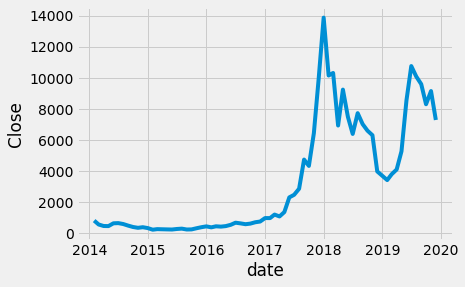

In [30]:
sns.lineplot(data=data_bitcoin, x="date", y="Close",estimator=None,n_boot=0)

Quartile:
 0.00      216.90
0.25      433.06
0.50      963.99
0.75     6409.96
1.00    13880.00
Name: Close, dtype: float64 
Mean: 3296.1918309859147


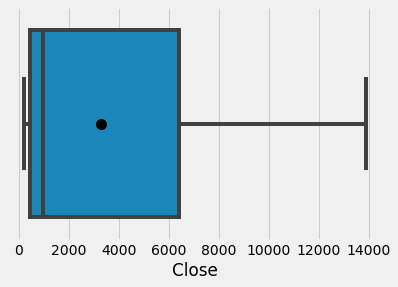

In [31]:
sns.boxplot(data=data_bitcoin, x="Close", showmeans=True,meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black", "markersize":"10"})
print("Quartile:\n", data_bitcoin["Close"].quantile([0,0.25,0.5,0.75,1.0]),"\nMean:",data_bitcoin["Close"].mean())

### 1.3.2 Auswertung von Lage- und Streuungsmaßen des Bitcoinkurses

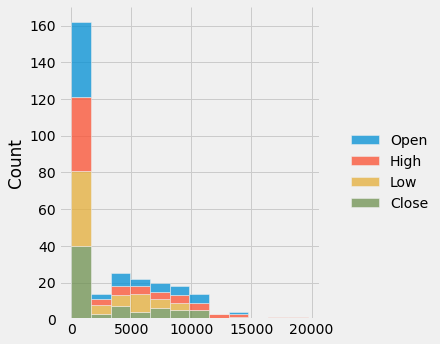

In [223]:
sns.displot(data_bitcoin[['Open','High','Low','Close']], multiple="stack")

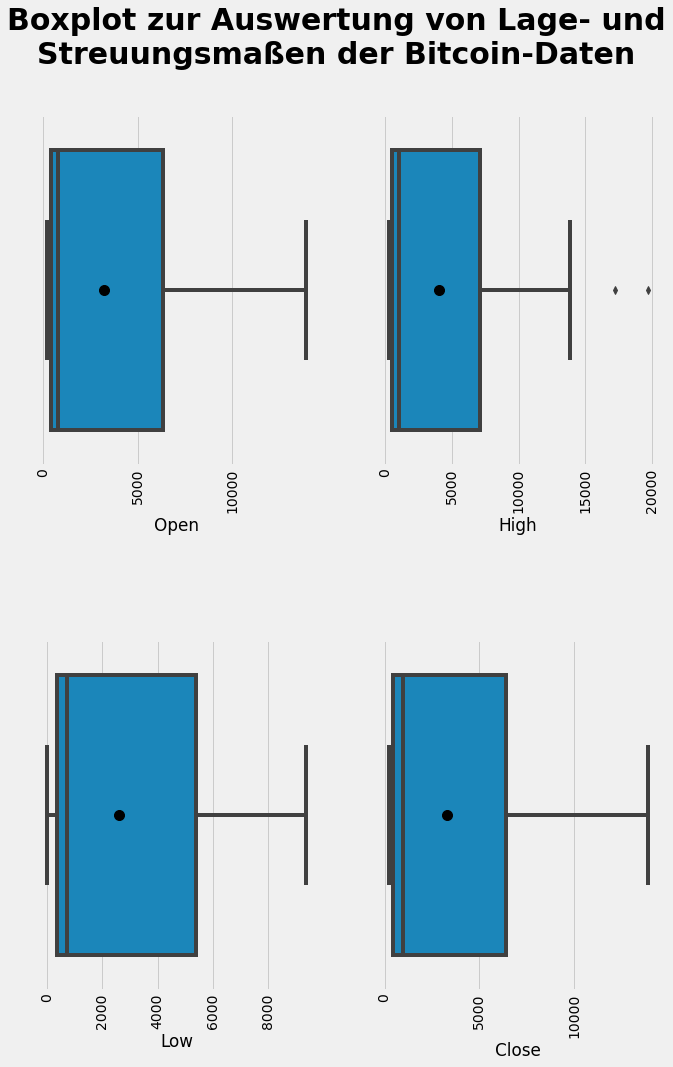

In [33]:
#Boxplot zur Auswertung von Lage- und Streuungsmaßen der Bitcoin-Daten
features = ['Open','High','Low','Close']
fig=plt.subplots(figsize=(10,15))
plt.suptitle('Boxplot zur Auswertung von Lage- und\nStreuungsmaßen der Bitcoin-Daten', fontsize=30, fontweight='extra bold')
length=len(features)
for i,j in itertools.zip_longest(features,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(int(np.ceil(length/2)),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.boxplot(x=i, data = data_bitcoin, showmeans=True,meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black", "markersize":"10"})
    plt.xticks(rotation=90)

Volume_BTC :
 Quartile:
 0.00     91453.301778
0.25    208057.786714
0.50    315108.531778
0.75    440969.681208
1.00    887623.846327
Name: Volume_BTC, dtype: float64 

Volume_USD :
 Quartile:
 0.00    4.723092e+07
0.25    1.143651e+08
0.50    3.053202e+08
0.75    1.607928e+09
1.00    8.303392e+09
Name: Volume_USD, dtype: float64 

Weighted_Price :
 Quartile:
 0.00    6.630241e+06
0.25    1.415262e+07
0.50    3.185014e+07
0.75    2.515174e+08
1.00    6.614735e+08
Name: Weighted_Price, dtype: float64 



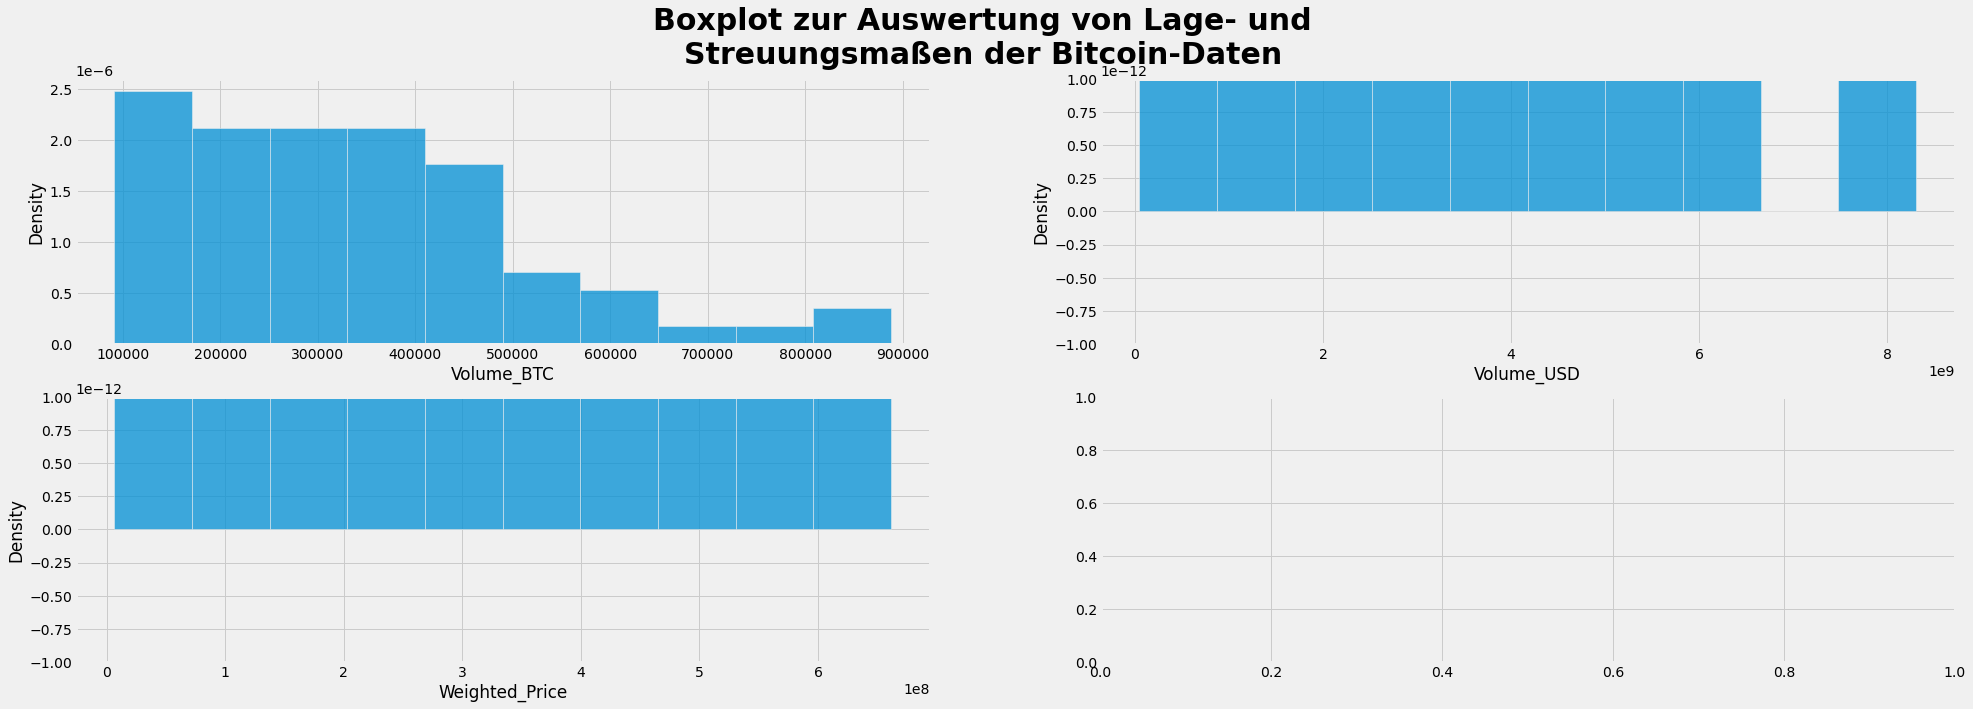

In [34]:
#Boxplot zur Auswertung von Lage- und Streuungsmaßen der Bitcoin-Daten
# Define the number of rows and columns you want
n_rows=2
n_cols=2

features = ['Volume_BTC', 'Volume_USD', 'Weighted_Price']
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 10))
plt.suptitle('Boxplot zur Auswertung von Lage- und\nStreuungsmaßen der Bitcoin-Daten', fontsize=30, fontweight='extra bold')

for index, item in enumerate(features):
    sns.histplot(ax=axes[index//n_cols, index%n_cols], stat='density', data=data_bitcoin, x=item, bins=10)
    print(item,":\n","Quartile:\n", data_bitcoin[item].quantile([0,0.25,0.5,0.75,1.0]),"\n")

Text(0.5, 0.98, 'Pairplot')

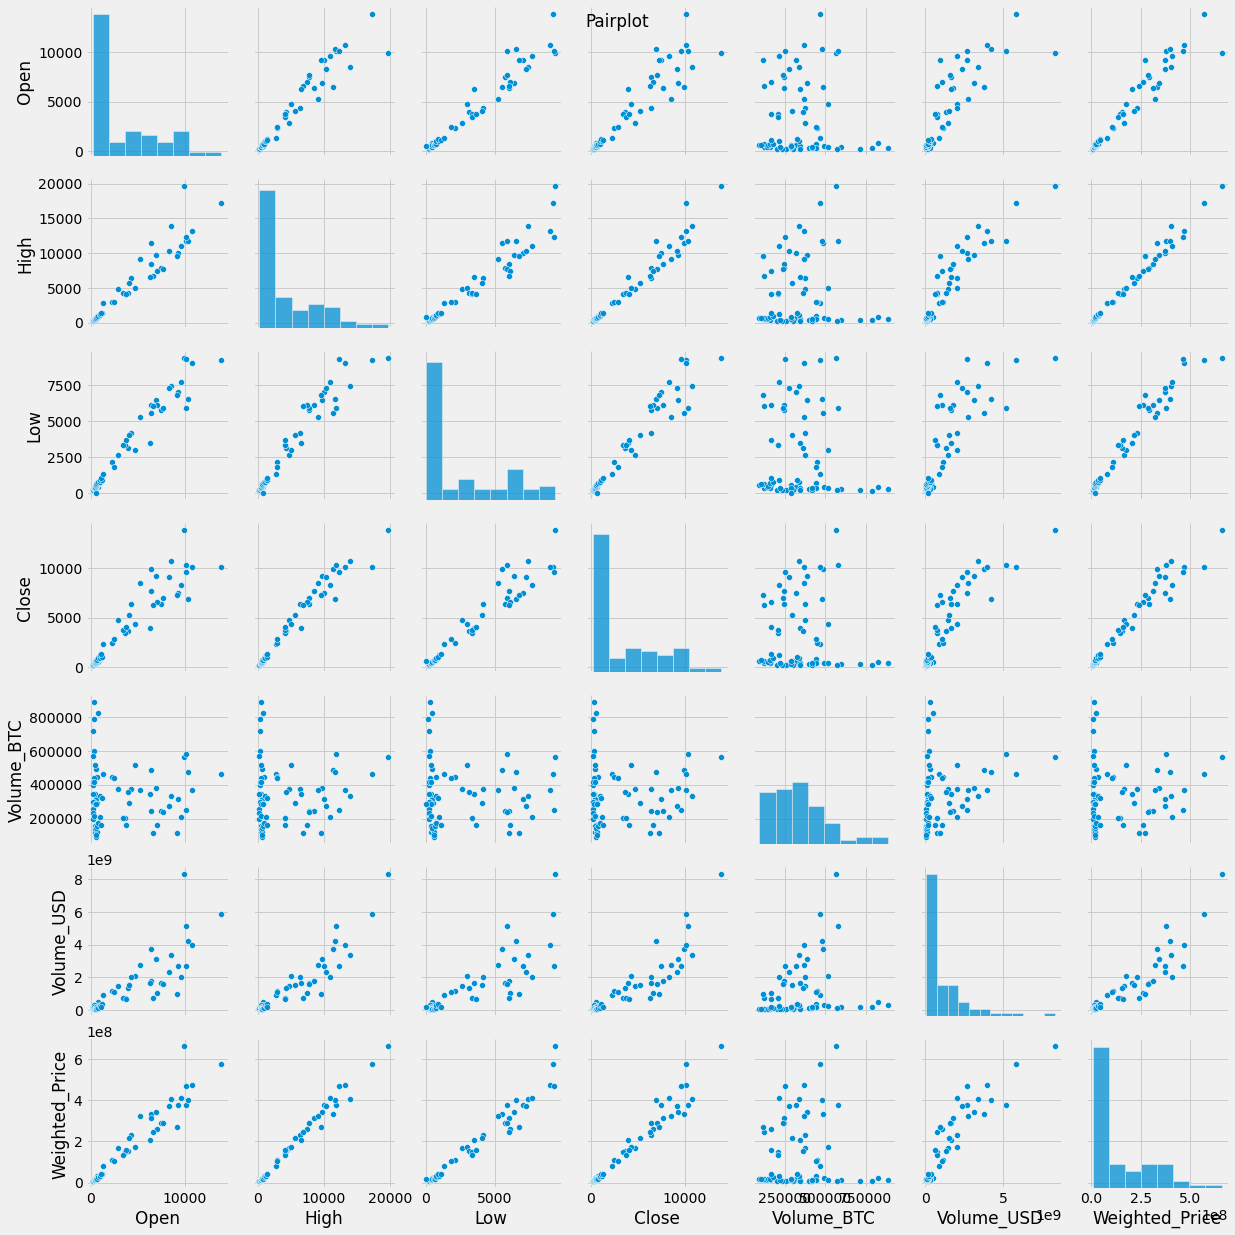

In [35]:
sns.pairplot(data_bitcoin)
plt.suptitle('Pairplot')

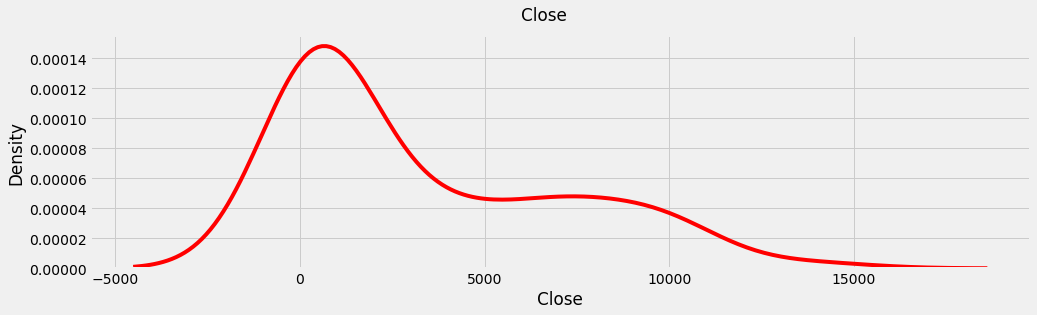

In [36]:
fig = plt.figure(figsize=(15,4),)
plt.suptitle('Close')
ax=sns.kdeplot(data_bitcoin['Close'], color='r',shade=False, label='Verteilung des Schlusskurses')

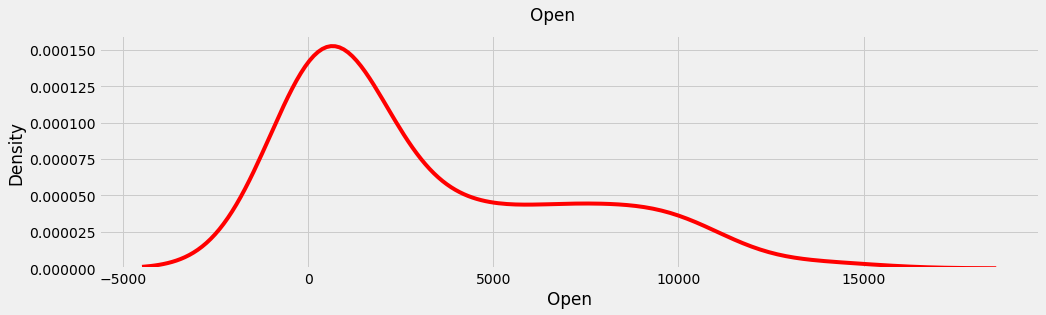

In [37]:
fig = plt.figure(figsize=(15,4),)
plt.suptitle('Open')
ax=sns.kdeplot(data_bitcoin['Open'], color='r',shade=False, label='Verteilung des Eröffnungskurses')

### 1.3.3 Twitter

In [38]:
data_tweets=df_tweets.dropna(how='any').groupby([pd.Grouper(freq='D'), 'label']).aggregate({'sentiment':'mean','likes':'max'})

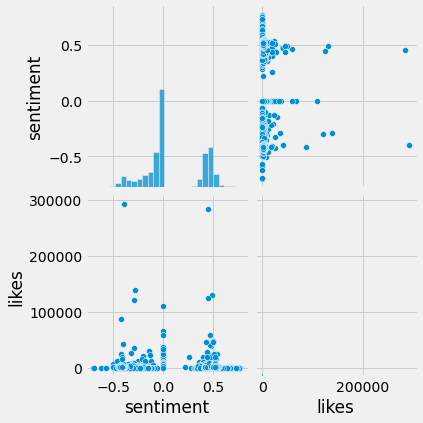

In [39]:
sns.pairplot(data_tweets, height=3)

Quartile:
 0.00   -0.698850
0.25   -0.077079
0.50    0.000000
0.75    0.430435
1.00    0.769520
Name: sentiment, dtype: float64 
Mean: 0.08727694510560845


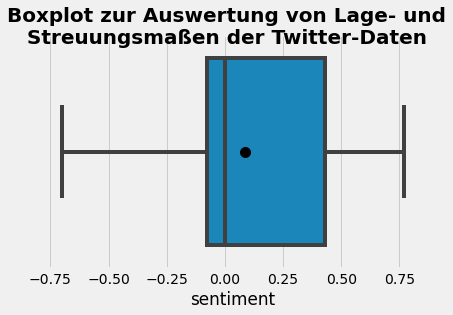

In [40]:
#Boxplot zur Auswertung von Lage- und Streuungsmaßen der Twitter-Sentiments
plt.style.use("fivethirtyeight")
sns.boxplot(x='sentiment', data = data_tweets, showmeans=True,meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black", "markersize":"10"})
plt.suptitle('Boxplot zur Auswertung von Lage- und\nStreuungsmaßen der Twitter-Daten', fontsize=20, fontweight='extra bold')
print("Quartile:\n", data_tweets["sentiment"].quantile([0,0.25,0.5,0.75,1.0]),"\nMean:",data_tweets["sentiment"].dropna().mean())

Text(0.5, 0.98, 'Verteilung der Likes')

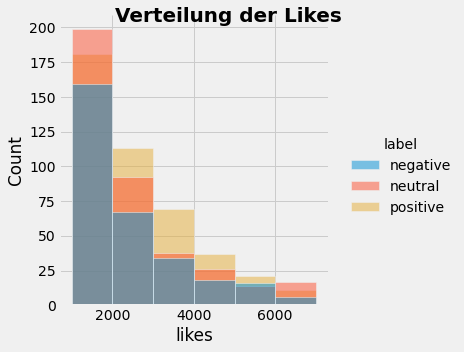

In [41]:
sns.displot(data_tweets, x="likes", bins=[1000, 2000, 3000, 4000, 5000, 6000, 7000], hue="label")
plt.suptitle('Verteilung der Likes', fontsize=20, fontweight='extra bold')

Text(0.5, 0.98, 'Verteilung der Sentiments')

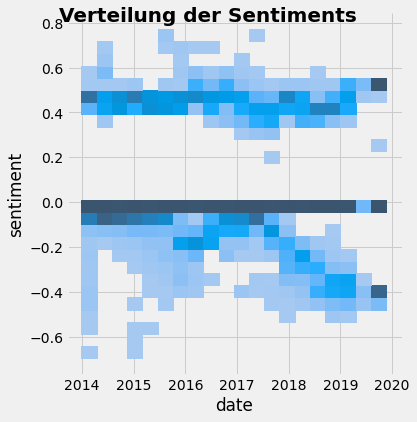

In [42]:
sns.displot(data_tweets, x="date", y="sentiment", height=6)
plt.suptitle('Verteilung der Sentiments', fontsize=20, fontweight='extra bold')

## 1.4 Überprüfung der Datenqualität

### 1.4.1 Datensatz Bitcoin

In [43]:
#Prüfung ob es Zeilen mit fehlenden Daten gibt
df_bitcoin.isnull().any()

Timestamp         False
Open               True
High               True
Low                True
Close              True
Volume_BTC         True
Volume_USD         True
Weighted_Price     True
dtype: bool

### 1.4.2 Datensatz Tweets

In [44]:
#Prüfung ob es Zeilen mit fehlenden Daten gibt
df_tweets.isnull().any()

sentiment    False
likes        False
label        False
dtype: bool

# 2. Data Preparation

## 2.1 Data Cleaning

### 2.1.1 Datensatz Bitcoin

In [45]:
#Lösche Zeilen mit fehlenden Werten
df_bitcoin.dropna(inplace=True)

In [46]:
#Lösche pberflüssige Spalte Timestamp
df_bitcoin.drop(['Timestamp'], axis=1, inplace=True)

### 2.1.2 Datensatz Tweets

In [47]:
#Auffüllen fehlender Werte durch 0
df_tweets.fillna(0, inplace=True)

In [48]:
df_tweets.reset_index(drop=False,inplace=True)

## 2.2 Data Transformation & Data Integration

### Festlegen des Beobachtungszeitraums und Diskretisierung der Twitterdaten

In [49]:
df_tweets

,date,sentiment,likes,label
0,2014-01-01 00:00:11+00:00,-0.0516,0,negative
1,2014-01-01 00:00:38+00:00,0.0000,0,neutral
2,2014-01-01 00:05:51+00:00,0.4404,0,positive
3,2014-01-01 00:06:01+00:00,0.0000,0,neutral
4,2014-01-01 00:09:01+00:00,0.0000,0,neutral
...,...,...,...,...
7578478,2019-11-23 15:45:52+00:00,0.5256,0,positive
7578479,2019-11-23 15:45:55+00:00,0.4404,0,positive
7578480,2019-11-23 15:45:55+00:00,0.4588,0,positive
7578481,2019-11-23 15:45:56+00:00,0.0000,0,neutral


Der Beobachtungszeitraum wird wie eingangs erwähnt auf den gemeinsamen Zeitraum von 05.02.2021 bis 17.07.2022 festgelegt. Das die Tweets zu unterschiedlichen Zeitpunkten getätigt wurden, als die vorliegenden Kursdaten von Bitcoin, wird das Datum der einzelnen Tweets angeglichen, indem das Datum auf die nächste halbe Stunden aufgerundet wird.

In [50]:
def round_to_next_30min(t):
    # Rounds to next half-hour by adding a timedelta
    if t.minute < 30:
        return (t.replace(second=0, microsecond=0, minute=30, hour=t.hour)).strftime("%Y-%m-%d %H:%M:%S")
    else:
        return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)+timedelta(hours=t.minute//30)).strftime("%Y-%m-%d %H:%M:%S")

In [51]:
#Transformiere die Uhrzeit der Tweets durch Aufrunden auf die nächste halbe Stunde
df_tweets["date"] = df_tweets.swifter.apply(lambda x: round_to_next_30min(x["date"]), axis = 1)

In [52]:
print("Zeitspanne der Tweets: von ", df_tweets['date'].min(), " bis ", df_tweets['date'].max())

Zeitspanne der Tweets: von  2014-01-01 00:30:00  bis  2019-11-23 16:00:00


In [53]:
print("Anzahl der Datenreihen vorher:", df_tweets.count())

Anzahl der Datenreihen vorher: date         7578483
sentiment    7578483
likes        7578483
label        7578483
dtype: int64


In [54]:
#Ignoriere Tweets mit like < threshold
threshold = 1000
mask = (df_tweets.likes > threshold)
df_tweets = df_tweets.loc[mask]

In [55]:
print("Anzahl der Datenreihen nachher:", df_tweets.count())

Anzahl der Datenreihen nachher: date         2627
sentiment    2627
likes        2627
label        2627
dtype: int64


In [56]:
df_tweets

,date,sentiment,likes,label
110126,2014-07-10 15:00:00,0.2732,3639,positive
204312,2015-01-13 00:00:00,0.1260,1929,positive
226485,2015-02-25 04:00:00,-0.2551,1681,negative
236708,2015-03-19 15:30:00,0.6514,1327,positive
313155,2015-10-02 18:00:00,0.0000,1531,neutral
...,...,...,...,...
7531433,2019-11-22 15:30:00,-0.3680,2236,negative
7535879,2019-11-22 17:00:00,0.4404,1247,positive
7538686,2019-11-22 18:00:00,0.5423,1939,positive
7558497,2019-11-23 04:00:00,0.5859,1143,positive


### Datenreduktion und Resampling der Bitcoin-Daten

Die Bitcoin-Daten sind intervallskaliert, jedoch weisen sie eine Intervallskala von 1min. auf. Die Daten müssen in ein Intervallskala von 30min. überführt werden, damit die Tweet-Daten entsprechend zugeordnet werden können.

In [57]:
df_bitcoin = df_bitcoin.resample('30min').aggregate({'Open':'first','High':'max','Low':'min','Close':'last','Volume_BTC':'sum',
                                                  'Volume_USD':'sum','Weighted_Price':'sum'})

### Mittelwert der Sentimentwerte

Die Sentimentwerte werden jeder einzelnen halbstündliche Periode zugeteilt und ein Mittelwert wird gebildet.

In [58]:
df_tweets

,date,sentiment,likes,label
110126,2014-07-10 15:00:00,0.2732,3639,positive
204312,2015-01-13 00:00:00,0.1260,1929,positive
226485,2015-02-25 04:00:00,-0.2551,1681,negative
236708,2015-03-19 15:30:00,0.6514,1327,positive
313155,2015-10-02 18:00:00,0.0000,1531,neutral
...,...,...,...,...
7531433,2019-11-22 15:30:00,-0.3680,2236,negative
7535879,2019-11-22 17:00:00,0.4404,1247,positive
7538686,2019-11-22 18:00:00,0.5423,1939,positive
7558497,2019-11-23 04:00:00,0.5859,1143,positive


In [59]:
df_tweets_pivot = pd.pivot_table(df_tweets, values = ['sentiment','label'], index=['date','label'], aggfunc={'sentiment': np.mean, 'likes':np.max}, fill_value=0, margins = False).unstack()
#df_tweets_pivot.columns=[re.sub('_$', '', '_'.join(col).strip()) for col in np.stack((df_tweets_pivot.columns.get_level_values(0), df_tweets_pivot.columns.get_level_values(1)), axis=1)]
df_tweets_pivot.columns=[re.sub('_$', '', '_'.join(col).strip()) for col in np.stack((df_tweets_pivot.columns.get_level_values(0), df_tweets_pivot.columns.get_level_values(1)), axis=1)]
df_tweets_pivot#.query("sentiment_positive>0 & sentiment_negative<0")

,likes_negative,likes_neutral,likes_positive,sentiment_negative,sentiment_neutral,sentiment_positive
date,,,,,,
2014-07-10 15:00:00,<NA>,<NA>,3639,NaN,NaN,0.2732
2015-01-13 00:00:00,<NA>,<NA>,1929,NaN,NaN,0.1260
2015-02-25 04:00:00,1681,<NA>,<NA>,-0.2551,NaN,NaN
2015-03-19 15:30:00,<NA>,<NA>,1327,NaN,NaN,0.6514
2015-10-02 18:00:00,<NA>,1531,<NA>,NaN,0.0,NaN
...,...,...,...,...,...,...
2019-11-22 15:30:00,2236,<NA>,<NA>,-0.3680,NaN,NaN
2019-11-22 17:00:00,<NA>,<NA>,1247,NaN,NaN,0.4404
2019-11-22 18:00:00,<NA>,<NA>,1939,NaN,NaN,0.5423


In [60]:
def majority_vote(x):
    col = pd.to_numeric(x[["likes_negative","likes_neutral","likes_positive"]]).idxmax(axis=1,skipna=True)
    if col == "likes_negative":
        return x["sentiment_negative"]
    elif col == "likes_neutral":
        return x["sentiment_neutral"]
    else:
        return x["sentiment_positive"]

In [61]:
#Aggregation der Tweets und Ermittlung des gewichteten Durchschnitt-Sentiments
df_tweets_pivot["sentiment"] = df_tweets_pivot.fillna(0).swifter.apply(lambda x: majority_vote(x), axis = 1)
#df_tweets_pivot = pd.pivot_table(df_tweets, values = ['sentiment'], index=['date'], aggfunc=np.mean, fill_value=0, margins = False)

In [62]:
#Reset Index
df_tweets_pivot.reset_index(drop=False, inplace=True)

In [63]:
df_tweets_pivot.head()

,date,likes_negative,likes_neutral,likes_positive,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment
0,2014-07-10 15:00:00,<NA>,<NA>,3639,NaN,NaN,0.2732,0.2732
1,2015-01-13 00:00:00,<NA>,<NA>,1929,NaN,NaN,0.1260,0.1260
2,2015-02-25 04:00:00,1681,<NA>,<NA>,-0.2551,NaN,NaN,-0.2551
3,2015-03-19 15:30:00,<NA>,<NA>,1327,NaN,NaN,0.6514,0.6514
4,2015-10-02 18:00:00,<NA>,1531,<NA>,NaN,0.0,NaN,0.0000


### Verschmelzung beider Datensätze

Die Twitter- und die Kursdaten werden zu einem einzelnen Datensatz verschmolzen. Beide Datensätze werden anhand das Datums gejoined.

In [64]:
df_tweets_pivot["date"] = pd.to_datetime(df_tweets_pivot['date'])

In [65]:
#Merge der beiden Datensätze anhand der Spalte 'date'
df_merged = df_bitcoin.merge(df_tweets_pivot[["date", "sentiment"]], how='left', left_on='date', right_on='date')

In [66]:
print(df_merged.shape)

(103297, 9)


In [67]:
df_merged

,date,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,sentiment
0,2014-01-01 00:00:00,732.00,738.25,729.01,734.81,266.179555,1.957673e+05,18345.728659,NaN
1,2014-01-01 00:30:00,734.81,739.90,734.47,739.02,308.968025,2.282145e+05,19183.847142,NaN
2,2014-01-01 01:00:00,739.02,739.97,737.65,738.11,65.669245,4.854268e+04,19208.472418,NaN
3,2014-01-01 01:30:00,738.00,742.00,737.65,741.89,710.271650,5.259410e+05,11830.556061,NaN
4,2014-01-01 02:00:00,741.89,757.99,741.89,752.23,1085.133350,8.121812e+05,21698.523026,NaN
...,...,...,...,...,...,...,...,...,...
103292,2019-11-22 22:00:00,7336.00,7358.02,7309.06,7330.42,90.143517,6.613790e+05,220096.714641,NaN
103293,2019-11-22 22:30:00,7330.43,7343.95,7232.56,7272.99,203.846180,1.483436e+06,218618.327249,NaN
103294,2019-11-22 23:00:00,7260.19,7266.83,7211.75,7256.81,177.699870,1.286155e+06,217402.349851,NaN
103295,2019-11-22 23:30:00,7266.01,7308.48,7256.82,7285.85,114.254244,8.326636e+05,218488.758078,NaN


### Bereinigung von fehlenden Daten und Datentypen

In [68]:
df_merged[df_merged.isna().any(axis=1)]

,date,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,sentiment
0,2014-01-01 00:00:00,732.00,738.25,729.01,734.81,266.179555,1.957673e+05,18345.728659,NaN
1,2014-01-01 00:30:00,734.81,739.90,734.47,739.02,308.968025,2.282145e+05,19183.847142,NaN
2,2014-01-01 01:00:00,739.02,739.97,737.65,738.11,65.669245,4.854268e+04,19208.472418,NaN
3,2014-01-01 01:30:00,738.00,742.00,737.65,741.89,710.271650,5.259410e+05,11830.556061,NaN
4,2014-01-01 02:00:00,741.89,757.99,741.89,752.23,1085.133350,8.121812e+05,21698.523026,NaN
...,...,...,...,...,...,...,...,...,...
103292,2019-11-22 22:00:00,7336.00,7358.02,7309.06,7330.42,90.143517,6.613790e+05,220096.714641,NaN
103293,2019-11-22 22:30:00,7330.43,7343.95,7232.56,7272.99,203.846180,1.483436e+06,218618.327249,NaN
103294,2019-11-22 23:00:00,7260.19,7266.83,7211.75,7256.81,177.699870,1.286155e+06,217402.349851,NaN
103295,2019-11-22 23:30:00,7266.01,7308.48,7256.82,7285.85,114.254244,8.326636e+05,218488.758078,NaN


In [69]:
print('Der finale Datensatz hat {} Zeilen und {} Spalten.'.format(df_merged.shape[0], df_merged.shape[1]))

Der finale Datensatz hat 103297 Zeilen und 9 Spalten.


In [70]:
#Sortierung nach 'date'
df_merged.sort_values(by=['date'], inplace=True, ignore_index=True)

In [71]:
df_merged

,date,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,sentiment
0,2014-01-01 00:00:00,732.00,738.25,729.01,734.81,266.179555,1.957673e+05,18345.728659,NaN
1,2014-01-01 00:30:00,734.81,739.90,734.47,739.02,308.968025,2.282145e+05,19183.847142,NaN
2,2014-01-01 01:00:00,739.02,739.97,737.65,738.11,65.669245,4.854268e+04,19208.472418,NaN
3,2014-01-01 01:30:00,738.00,742.00,737.65,741.89,710.271650,5.259410e+05,11830.556061,NaN
4,2014-01-01 02:00:00,741.89,757.99,741.89,752.23,1085.133350,8.121812e+05,21698.523026,NaN
...,...,...,...,...,...,...,...,...,...
103292,2019-11-22 22:00:00,7336.00,7358.02,7309.06,7330.42,90.143517,6.613790e+05,220096.714641,NaN
103293,2019-11-22 22:30:00,7330.43,7343.95,7232.56,7272.99,203.846180,1.483436e+06,218618.327249,NaN
103294,2019-11-22 23:00:00,7260.19,7266.83,7211.75,7256.81,177.699870,1.286155e+06,217402.349851,NaN
103295,2019-11-22 23:30:00,7266.01,7308.48,7256.82,7285.85,114.254244,8.326636e+05,218488.758078,NaN


In [72]:
df_merged.reset_index(drop=True, inplace=True)

In [73]:
df_merged[df_merged.Volume_BTC == 0]

,date,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,sentiment
1169,2014-01-25 08:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1170,2014-01-25 09:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1172,2014-01-25 10:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1555,2014-02-02 09:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1556,2014-02-02 10:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
17942,2015-01-09 19:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
17943,2015-01-09 19:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
17944,2015-01-09 20:00:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
17945,2015-01-09 20:30:00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN


In [74]:
#Lösche Datensätze ohne "Umsatz"
df_merged.drop(df_merged[df_merged.Volume_BTC == 0].index, inplace=True)

In [75]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103072 entries, 0 to 103296
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            103072 non-null  datetime64[ns]
 1   Open            103072 non-null  float64       
 2   High            103072 non-null  float64       
 3   Low             103072 non-null  float64       
 4   Close           103072 non-null  float64       
 5   Volume_BTC      103072 non-null  float64       
 6   Volume_USD      103072 non-null  float64       
 7   Weighted_Price  103072 non-null  float64       
 8   sentiment       2400 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 7.9 MB


In [76]:
#Bereinige Datensätze ohne Twittersentiment
df_merged.fillna(0, inplace=True)

In [77]:
df_merged.reset_index(drop=True, inplace=True)

In [78]:
df_merged[df_merged.isna().any(axis=1)]

,date,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,sentiment


In [79]:
df_merged

,date,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,sentiment
0,2014-01-01 00:00:00,732.00,738.25,729.01,734.81,266.179555,1.957673e+05,18345.728659,0.0
1,2014-01-01 00:30:00,734.81,739.90,734.47,739.02,308.968025,2.282145e+05,19183.847142,0.0
2,2014-01-01 01:00:00,739.02,739.97,737.65,738.11,65.669245,4.854268e+04,19208.472418,0.0
3,2014-01-01 01:30:00,738.00,742.00,737.65,741.89,710.271650,5.259410e+05,11830.556061,0.0
4,2014-01-01 02:00:00,741.89,757.99,741.89,752.23,1085.133350,8.121812e+05,21698.523026,0.0
...,...,...,...,...,...,...,...,...,...
103067,2019-11-22 22:00:00,7336.00,7358.02,7309.06,7330.42,90.143517,6.613790e+05,220096.714641,0.0
103068,2019-11-22 22:30:00,7330.43,7343.95,7232.56,7272.99,203.846180,1.483436e+06,218618.327249,0.0
103069,2019-11-22 23:00:00,7260.19,7266.83,7211.75,7256.81,177.699870,1.286155e+06,217402.349851,0.0
103070,2019-11-22 23:30:00,7266.01,7308.48,7256.82,7285.85,114.254244,8.326636e+05,218488.758078,0.0


### Target

Das Target ist der Trend, den der Bitcoinkurs verzeichnet. Es wurde beobachtet, dass negative Tweets eine Auswirkung auf den Kurs innerhalb weniger Stunden haben können. Dieser Sachverhalt soll untersucht werden. Aus diesem Grunde soll das Target den Trend innerhalb eines Zeithorizontes von 5 Stunden beschreiben. Dazu wird per Rolling-Window-Verfahren ein Simple Moving Average des Schlusskurses der nächsten 10 Zeitperioden berechnet und mit dem jeweils aktuellen Schlusskurs verglichen. Falls der Mittelwert kleiner ist, als der aktuelle Schlusskurs, so wird im Target eine 1 gesetzt. Andernfalls erhält das Target eine 0.

In [80]:
#Festlegen der Targets
#Downtrend: Avg. Close of next n periods < Current periods close

#Anzahl der Perioden (1 Periode = 30min.):
n_periods = 10

df_merged["trend"] = np.where(df_merged['Close'].shift(-n_periods).rolling(n_periods, min_periods = 1).mean() < df_merged['Close'], 1, 0)


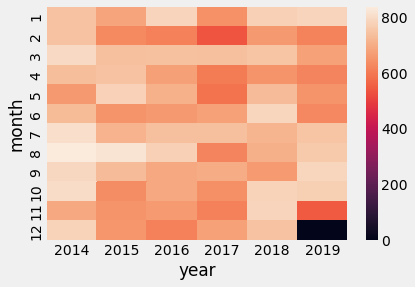

In [81]:
df_merged["month"] = df_merged["date"].dt.month
df_merged["year"] = df_merged["date"].dt.year

pivot = pd.pivot_table(df_merged, values='trend', index=['month'], columns=['year'], aggfunc='sum').fillna(0)
sns.heatmap(pivot)



In [82]:
pivot

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,746.0,683.0,784.0,644.0,775.0,786.0
2,745.0,632.0,616.0,536.0,661.0,620.0
3,795.0,741.0,742.0,741.0,748.0,677.0
4,738.0,745.0,674.0,607.0,650.0,622.0
5,662.0,778.0,711.0,588.0,733.0,653.0
6,730.0,652.0,662.0,677.0,788.0,630.0
7,808.0,712.0,740.0,741.0,717.0,751.0
8,836.0,819.0,777.0,623.0,706.0,764.0
9,791.0,732.0,692.0,700.0,665.0,790.0


### Prüfung und Bereinigung der Verteilung der Daten

Bevor mit den nächsten Schritten fortgefahren werden kann, muss zunächst überprüft werden, wie die einzelnen Features verteilt sind. Das Ziel ist für alle Features, soweit möglich, die Gaußsche Normalverteilung.

In [83]:
#Entferne das Datum
df_merged.drop(["date","month","year"], inplace=True, axis=1)

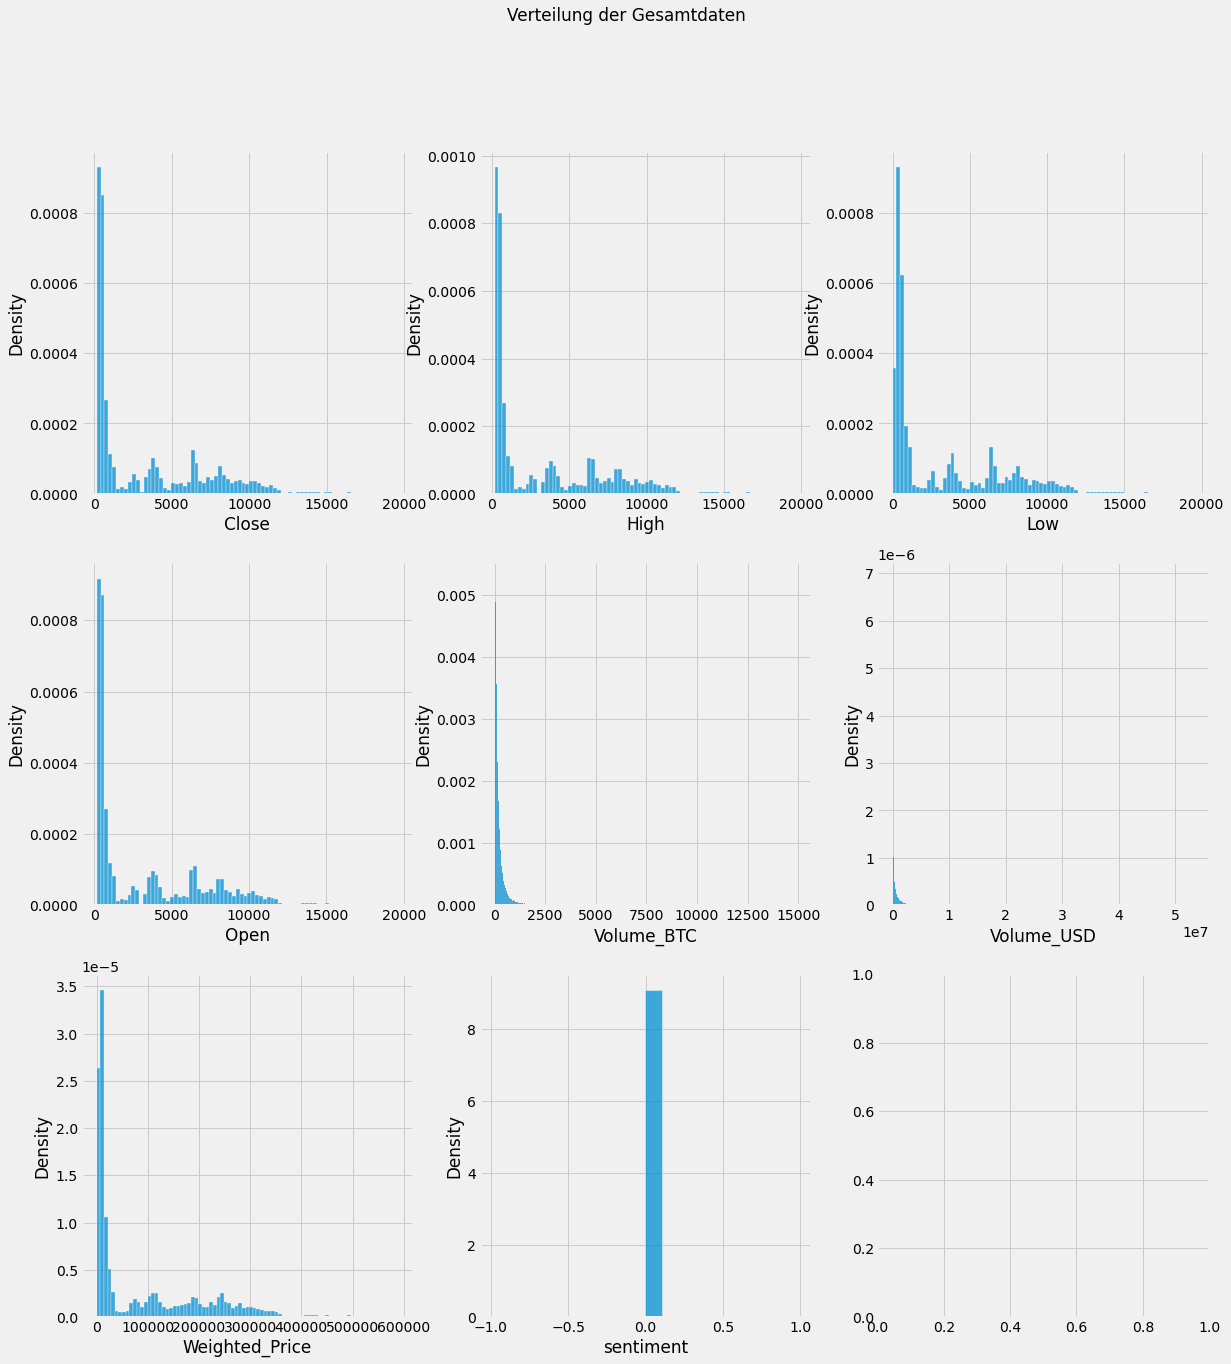

In [84]:
features = df_merged.columns.difference(['trend'])
# Define the number of rows and columns you want
n_rows=3
n_cols=3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
fig.suptitle("Verteilung der Gesamtdaten")

for index, item in enumerate(features):
    sns.histplot(ax=axes[index//n_cols, index%n_cols], stat='density', data=df_merged, y=df_merged.index.name, x=item)

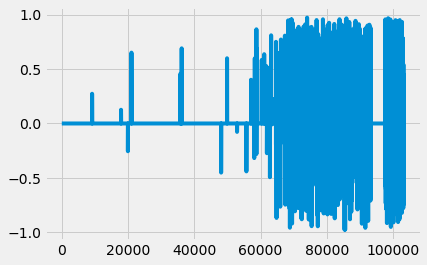

In [85]:
df_merged["sentiment"].plot(use_index=True)

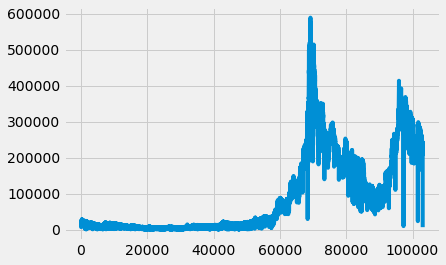

In [86]:
df_merged["Weighted_Price"].plot(use_index=True)

In [87]:
#Feature mit vielen Outliern: sentiment
sentiment_features = ["sentiment"]
all_other_features = [x for x in df_merged.columns if x not in sentiment_features]

#Log Transform
#df_log = np.log(1+df_merged[["sentiment"]])
scaler = QuantileTransformer(output_distribution='normal')
#scaler = StandardScaler()
df_log = pd.DataFrame(scaler.fit_transform(df_merged[sentiment_features]), columns=sentiment_features)

df_other = df_merged[all_other_features]

df_log_transformed = pd.concat([df_log, df_other], axis = 1)

In [88]:
#Gibt es Zeilen mit leerem Inhalt?
df_log_transformed

,sentiment,Open,High,Low,Close,Volume_BTC,Volume_USD,Weighted_Price,trend
0,-0.007527,732.00,738.25,729.01,734.81,266.179555,1.957673e+05,18345.728659,0
1,-0.007527,734.81,739.90,734.47,739.02,308.968025,2.282145e+05,19183.847142,0
2,-0.007527,739.02,739.97,737.65,738.11,65.669245,4.854268e+04,19208.472418,0
3,-0.007527,738.00,742.00,737.65,741.89,710.271650,5.259410e+05,11830.556061,0
4,-0.007527,741.89,757.99,741.89,752.23,1085.133350,8.121812e+05,21698.523026,1
...,...,...,...,...,...,...,...,...,...
103067,-0.007527,7336.00,7358.02,7309.06,7330.42,90.143517,6.613790e+05,220096.714641,1
103068,-0.007527,7330.43,7343.95,7232.56,7272.99,203.846180,1.483436e+06,218618.327249,0
103069,-0.007527,7260.19,7266.83,7211.75,7256.81,177.699870,1.286155e+06,217402.349851,0
103070,-0.007527,7266.01,7308.48,7256.82,7285.85,114.254244,8.326636e+05,218488.758078,1


In [89]:
#Bimodale, nicht-stationäre Features
#Quantile Transformation zur Gauss'schen Glättung
ohlc_features = ['Open', 'High', 'Low', 'Close']
all_other_features = [x for x in df_log_transformed.columns if x not in ohlc_features]

#Sqrt/Difference Transform
df_non_stationary_1=np.sqrt(df_log_transformed[ohlc_features])
df_non_stationary_2=df_non_stationary_1.diff().dropna()

scaler = QuantileTransformer(n_quantiles=47154,output_distribution='normal')
df_quant = pd.DataFrame(scaler.fit_transform(df_non_stationary_2[ohlc_features]), columns=ohlc_features)

df_other = df_log_transformed[all_other_features]

df_logdiff_transformed = pd.concat([df_quant, df_other], axis = 1)

In [90]:
#Gibt es Zeilen mit leerem Inhalt?
df_logdiff_transformed

,Open,High,Low,Close,sentiment,Volume_BTC,Volume_USD,Weighted_Price,trend
0,0.842265,0.779697,1.187418,1.026322,-0.007527,266.179555,1.957673e+05,18345.728659,0
1,1.032915,0.231188,0.895558,-0.409747,-0.007527,308.968025,2.282145e+05,19183.847142,0
2,-0.464173,0.852224,-0.151901,0.970046,-0.007527,65.669245,4.854268e+04,19208.472418,0
3,0.993723,1.861273,1.045147,1.525347,-0.007527,710.271650,5.259410e+05,11830.556061,0
4,1.523554,-0.947651,1.146174,-1.136916,-0.007527,1085.133350,8.121812e+05,21698.523026,1
...,...,...,...,...,...,...,...,...,...
103067,-0.664380,-1.151904,-2.042452,-1.879435,-0.007527,90.143517,6.613790e+05,220096.714641,1
103068,-1.999893,-2.201067,-1.325424,-1.153980,-0.007527,203.846180,1.483436e+06,218618.327249,0
103069,0.652307,1.752665,1.781562,1.459658,-0.007527,177.699870,1.286155e+06,217402.349851,0
103070,0.909688,-1.342452,1.255447,-0.043187,-0.007527,114.254244,8.326636e+05,218488.758078,1


In [91]:
#Rechtschiefe Features

right_skewed_features = ['Volume_BTC', 'Volume_USD','Weighted_Price']
all_other_features = [x for x in df_logdiff_transformed.columns if x not in right_skewed_features]

#Log Transform
df_log = np.log(0.0001 + df_merged[right_skewed_features])
df_other = df_logdiff_transformed[all_other_features]

df_log_transformed = pd.concat([df_log, df_other], axis = 1)

In [92]:
df_log_transformed

,Volume_BTC,Volume_USD,Weighted_Price,Open,High,Low,Close,sentiment,trend
0,5.584171,12.184682,9.817152,0.842265,0.779697,1.187418,1.026322,-0.007527,0
1,5.733238,12.338041,9.861824,1.032915,0.231188,0.895558,-0.409747,-0.007527,0
2,4.184632,10.790199,9.863107,-0.464173,0.852224,-0.151901,0.970046,-0.007527,0
3,6.565648,13.172944,9.378441,0.993723,1.861273,1.045147,1.525347,-0.007527,0
4,6.989458,13.607479,9.984999,1.523554,-0.947651,1.146174,-1.136916,-0.007527,1
...,...,...,...,...,...,...,...,...,...
103067,4.501404,13.402082,12.301822,-0.664380,-1.151904,-2.042452,-1.879435,-0.007527,1
103068,5.317366,14.209871,12.295083,-1.999893,-2.201067,-1.325424,-1.153980,-0.007527,0
103069,5.180097,14.067168,12.289505,0.652307,1.752665,1.781562,1.459658,-0.007527,0
103070,4.738427,13.632385,12.294490,0.909688,-1.342452,1.255447,-0.043187,-0.007527,1


In [237]:
#Standardize
features = [x for x in df_log_transformed.columns.difference(['trend'])]

scaler = StandardScaler()
df_target = df_merged["trend"]

df_final = pd.concat([pd.DataFrame(scaler.fit_transform(df_log_transformed[features]), columns=features), df_target], axis=1)

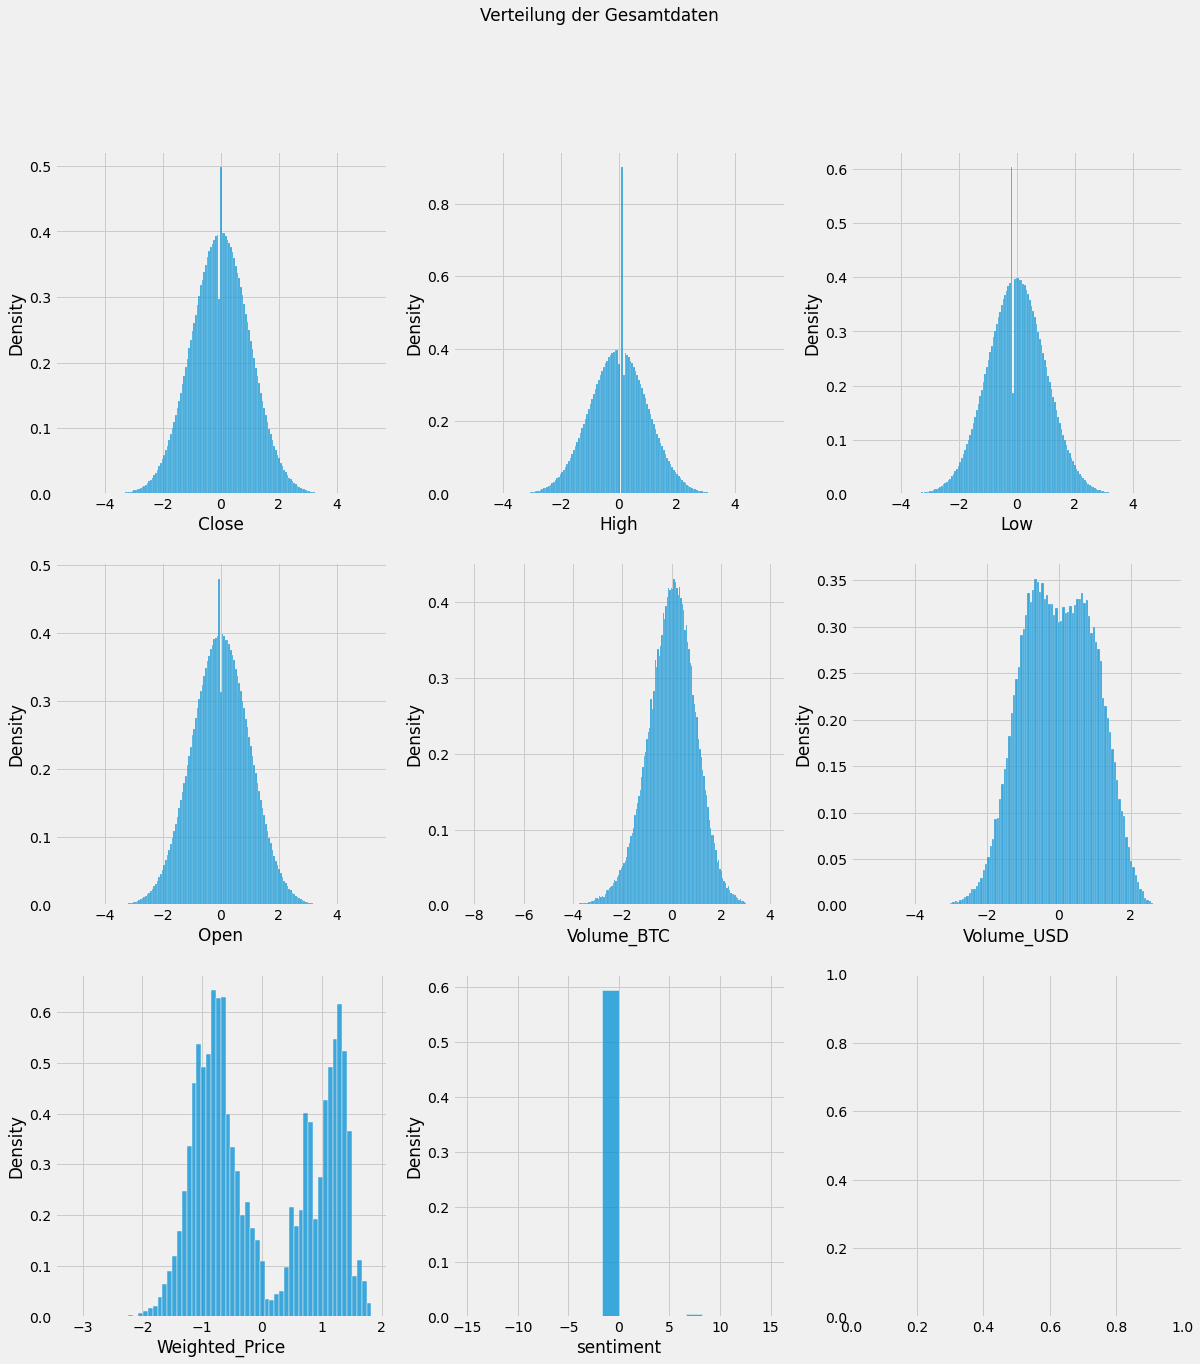

In [238]:
features = df_final.columns.difference(['trend'])
# Define the number of rows and columns you want
n_rows=3
n_cols=3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
fig.suptitle("Verteilung der Gesamtdaten")

for index, item in enumerate(features):
    sns.histplot(ax=axes[index//n_cols, index%n_cols], stat='density', data=df_final, y=df_final.index.name, x=item)

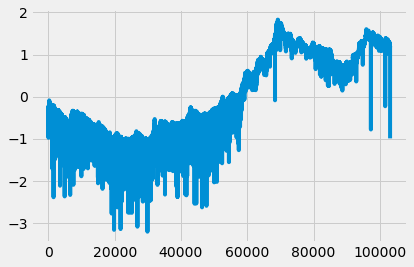

In [95]:
df_final["Weighted_Price"].plot(use_index=True)

In [240]:
#Feature ist bimodal
price_features = ["Weighted_Price"]
all_other_features = [x for x in df_final.columns if x not in price_features]

#Quantile Transform
scaler = QuantileTransformer(n_quantiles=47154,output_distribution='normal')

df_quant = pd.DataFrame(scaler.fit_transform(df_final[price_features]), columns=price_features)

df_other = df_final[all_other_features]

df_final = pd.concat([df_quant, df_other], axis = 1)

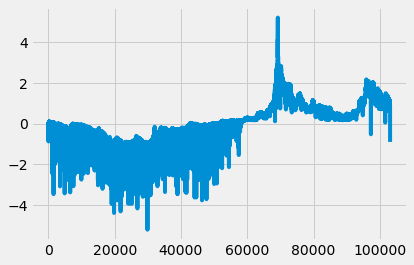

In [241]:
df_final["Weighted_Price"].plot(use_index=True)

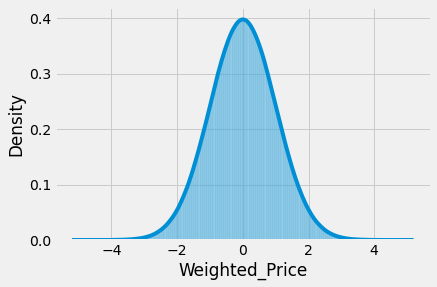

In [242]:
fig.suptitle("Verteilung Weighted_Price")
sns.histplot(stat='density', data=df_final, y=df_final.index.name, x="Weighted_Price", kde = True)

In [98]:
df_final

,Weighted_Price,Close,High,Low,Open,Volume_BTC,Volume_USD,sentiment,trend
0,NaN,1.025178,0.778342,1.188343,0.841416,0.677871,0.087896,-0.041475,0
1,0.028691,-0.410393,0.229915,0.896358,1.032126,0.799642,0.168013,-0.041475,0
2,0.000824,0.968922,0.850857,-0.151553,-0.465437,-0.465405,-0.640606,-0.041475,0
3,-0.311280,1.524031,1.859755,1.046011,0.992922,1.479633,0.604181,-0.041475,0
4,0.389566,-1.137310,-0.948747,1.147081,1.522921,1.825842,0.831189,-0.041475,1
...,...,...,...,...,...,...,...,...,...
103067,0.000284,-1.879572,-1.152970,-2.042920,-0.665707,-0.206636,0.723886,-0.041475,1
103068,-0.004329,-1.154368,-2.201975,-1.325583,-2.001643,0.459919,1.145889,-0.041475,0
103069,-0.003582,1.458365,1.751163,1.782744,0.651397,0.347784,1.071338,-0.041475,0
103070,0.003202,-0.043960,-1.343489,1.256402,0.908860,-0.013013,0.844200,-0.041475,1


## 2.3 Feature Transformation

### Stationaritätstests

Vor der weiteren Verarbeitung der Daten, wird der Datensatz auf Stationaritäten untersucht, die das Ergebnis evt. verfälschen können. Sollten die Daten stationär sein, müssen sie im späteren Schritt Datentransformation bereinigt werden. Die Stationarität wird mit dem erweiterten Dickey-Fuller-Test überprüft.

In [231]:
for value in [x for x in df_final.columns]:
    res = adfuller(df_final[value].dropna())

    # Printing the statistical result of the adfuller test
    print("Feature: ", value)
    print("Augmented Dickey-Fuller Statistic: %f" % res[0])
    print("p-value: %f" % res[1])
    if res[1] > 0.05:
        print("p-Wert ist größer als 0.05 => H0 wird nicht verworfen. Datensatz ist stationär.", "\n")
    else:
        print("p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär.", "\n")

Feature:  Weighted_Price
Augmented Dickey-Fuller Statistic: -38.479457
p-value: 0.000000
p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär. 

Feature:  Close
Augmented Dickey-Fuller Statistic: -40.715006
p-value: 0.000000
p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär. 

Feature:  High
Augmented Dickey-Fuller Statistic: -36.295655
p-value: 0.000000
p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär. 

Feature:  Low
Augmented Dickey-Fuller Statistic: -33.572650
p-value: 0.000000
p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär. 

Feature:  Open
Augmented Dickey-Fuller Statistic: -40.105667
p-value: 0.000000
p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär. 

Feature:  Volume_BTC
Augmented Dickey-Fuller Statistic: -19.622606
p-value: 0.000000
p-Wert ist kleiner als 0.05 => H0 wird verworfen. Datensatz ist nicht stationär. 

Feature:  Vo

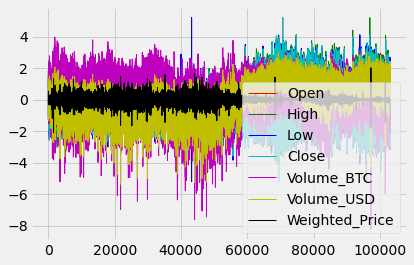

In [100]:
# Plotte die Verteilung aller Features
plt.plot(df_final.index, 'Open', data=df_final, color='r',label='Open',linewidth=1)
plt.plot(df_final.index, 'High', data=df_final, color='g',label='High',linewidth=1)
plt.plot(df_final.index, 'Low', data=df_final, color='b',label='Low',linewidth=1)
plt.plot(df_final.index, 'Close', data=df_final, color='c',label='Close',linewidth=1)
plt.plot(df_final.index, 'Volume_BTC', data=df_final, color='m',label='Volume_BTC',linewidth=1)
plt.plot(df_final.index, 'Volume_USD', data=df_final, color='y',label='Volume_USD',linewidth=1)
plt.plot(df_final.index, 'Weighted_Price', data=df_final, color='k',label='Weighted_Price',linewidth=1)
plt.legend();

## 2.4 Data Reduction

In [101]:
#Gibt es Zeilen mit leerem Inhalt?
df_final[df_final.isna().any(axis=1)]

,Weighted_Price,Close,High,Low,Open,Volume_BTC,Volume_USD,sentiment,trend
0,NaN,1.025178,0.778342,1.188343,0.841416,0.677871,0.087896,-0.041475,0
103071,-2.185031,NaN,NaN,NaN,NaN,-1.102736,0.146477,-0.041475,0


In [102]:
#Lösche Zeilen mit leeren Zellen
df_final.dropna(how='any', inplace=True)

## 2.6 Feature Engineering

In [103]:
df_target = df_final[["trend"]]

In [104]:
df_features = df_final[df_final.columns.difference(df_target.columns)]

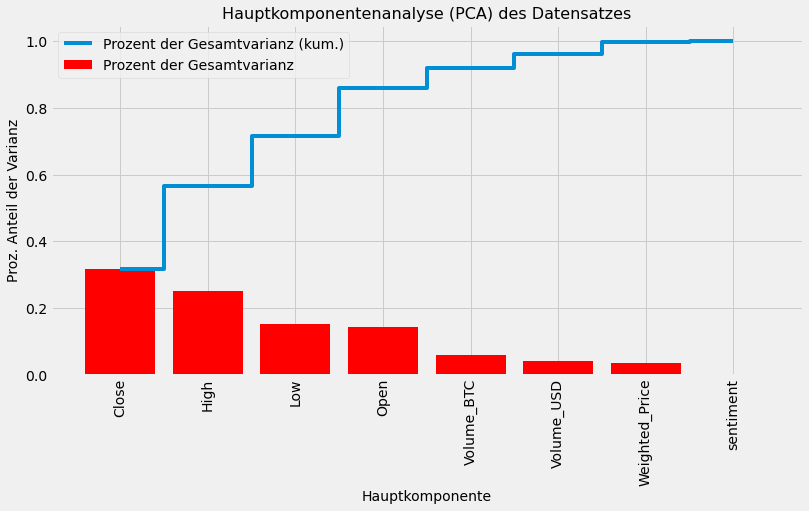

In [105]:
# Build PCA using standarized trained data
targets = df_target.columns
predictors = df_features.columns

X = df_features
y = df_target

pca = PCA(n_components=None, svd_solver="full")
pca.fit(X)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(predictors)+1), pca.explained_variance_ratio_, align="center",
        color='red', label="Prozent der Gesamtvarianz")
plt.step(range(1, len(predictors)+1), cum_var_exp, where="mid", label="Prozent der Gesamtvarianz (kum.)")
plt.xticks(range(1, len(predictors)+1), predictors, rotation='vertical')
plt.legend(loc="best")
plt.xlabel("Hauptkomponente", {"fontsize": 14})
plt.ylabel("Proz. Anteil der Varianz", {"fontsize": 14})
plt.title("Hauptkomponentenanalyse (PCA) des Datensatzes", {"fontsize": 16});

Ergebnis: Die kummulative Varianz wird zu mind. 98% durch 7 Hauptkomponenten erklärt, somit ist keine weitere Reduzierung der Dimensionen nötig.

In [106]:
df_features

,Close,High,Low,Open,Volume_BTC,Volume_USD,Weighted_Price,sentiment
1,-0.410393,0.229915,0.896358,1.032126,0.799642,0.168013,0.028691,-0.041475
2,0.968922,0.850857,-0.151553,-0.465437,-0.465405,-0.640606,0.000824,-0.041475
3,1.524031,1.859755,1.046011,0.992922,1.479633,0.604181,-0.311280,-0.041475
4,-1.137310,-0.948747,1.147081,1.522921,1.825842,0.831189,0.389566,-0.041475
5,-1.155933,-1.251805,-1.193780,-1.143755,0.695660,0.110756,-0.068436,-0.041475
...,...,...,...,...,...,...,...,...
103066,-1.109811,0.477887,-0.760454,1.002984,0.075315,0.903888,0.000637,-0.041475
103067,-1.879572,-1.152970,-2.042920,-0.665707,-0.206636,0.723886,0.000284,-0.041475
103068,-1.154368,-2.201975,-1.325583,-2.001643,0.459919,1.145889,-0.004329,-0.041475
103069,1.458365,1.751163,1.782744,0.651397,0.347784,1.071338,-0.003582,-0.041475


### Aufteilung der Daten in Features und Targets

In [107]:
tweet_features = [x for x in df_features.columns if x in ['replies', 'likes', 'retweets', 'sentiment']]

In [108]:
targets = df_target.columns

In [109]:
features_ohneTweets = df_features.drop(tweet_features,axis=1)
features_mitTweets = df_features

target = df_target[targets].values.ravel()

## Class Weigth überprüfen

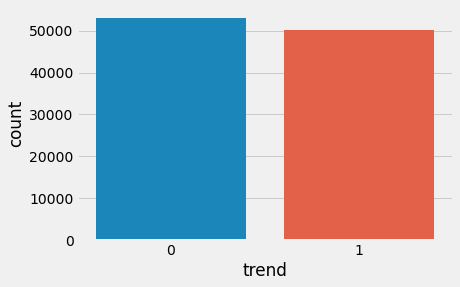

In [284]:
sns.countplot(x=df_final["trend"])

Es handelt sich um einen balancierten Datensatz.

### Korrelationsanalyse der Features mit Twitter-Sentiment

Text(0.5, 0.98, 'Korrelationsmatrix der einzelnen Merkmale nach Pearson')

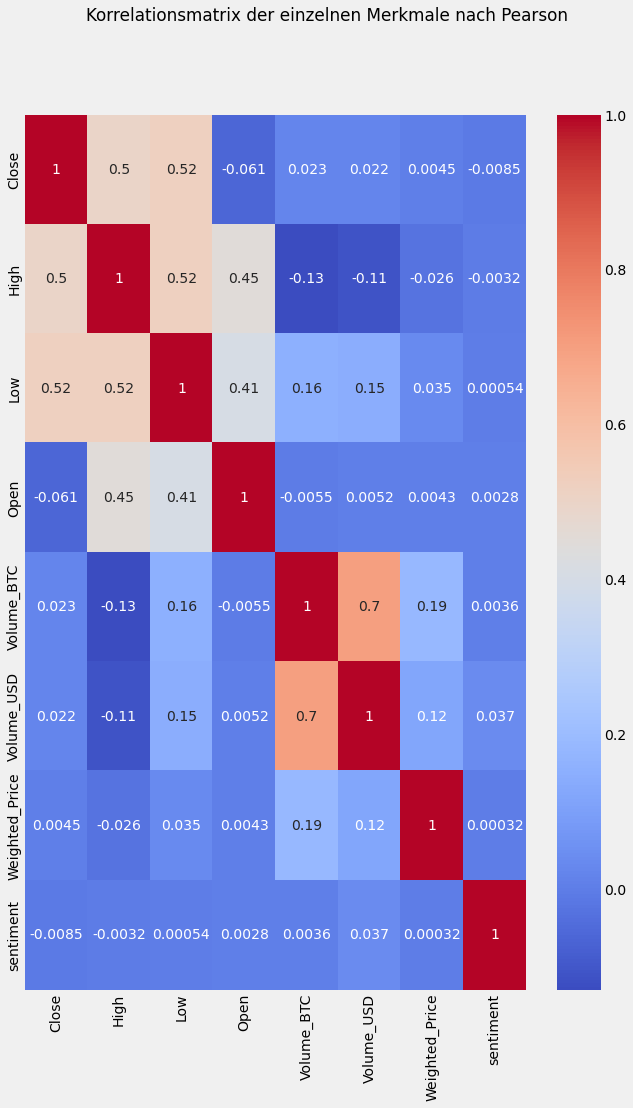

In [110]:
corr= features_mitTweets.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)
plt.suptitle('Korrelationsmatrix der einzelnen Merkmale nach Pearson')
#plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=False, top = False, labeltop=True)

Text(0.5, 0.98, 'Korrelationsmatrix der einzelnen Merkmale nach Spearman')

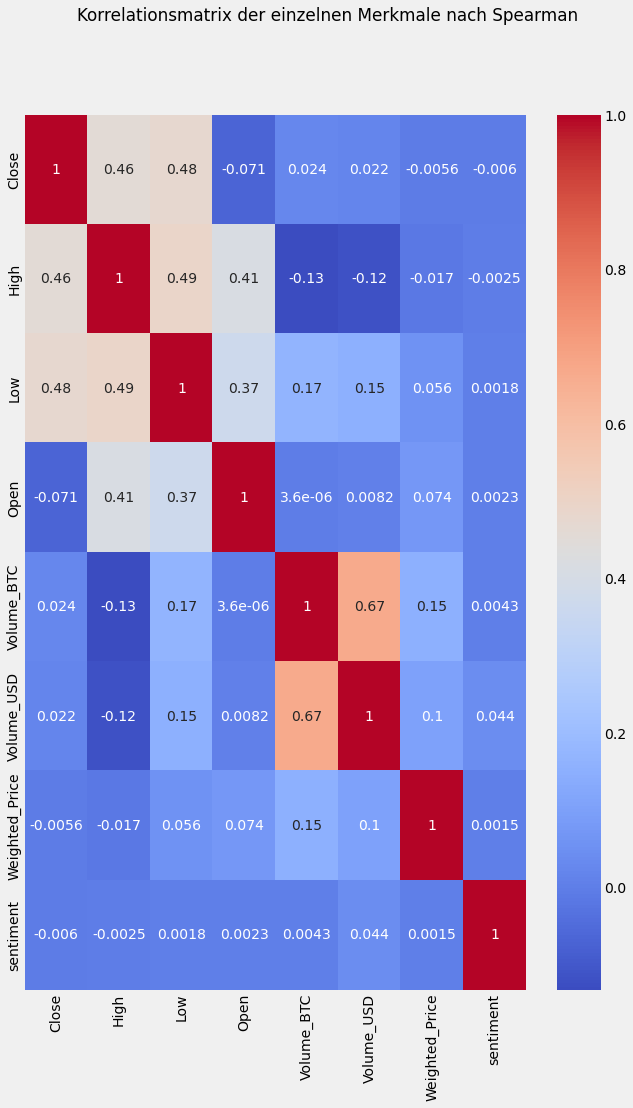

In [111]:
corr= features_mitTweets.corr(method='spearman')
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)
plt.suptitle('Korrelationsmatrix der einzelnen Merkmale nach Spearman')

### Hierarchische Clusteranalyse

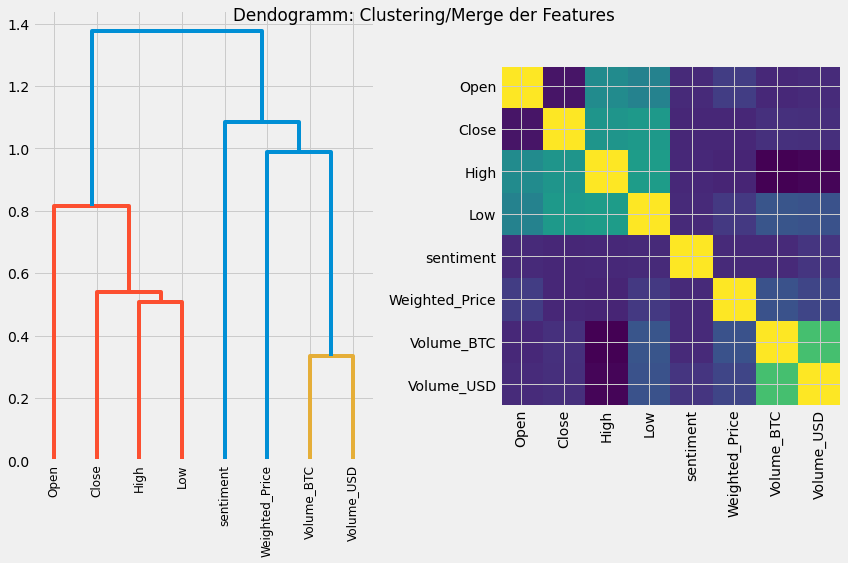

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(features_mitTweets).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=features_mitTweets.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.suptitle("Dendogramm: Clustering/Merge der Features")
plt.show()

Entfernen der beiden korrelierenden Features mit den geringsten Distanzen: 'Volume' und 'Quote Asset Volume

# 3. Modelling

## 3.1 Vergleich und Auswahl von Klassifikationsmodellen

In [246]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)
lgb_model = lgb.LGBMClassifier()


# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    knn = cross_validate(knn_model, X, y, cv=folds, scoring=scoring)
    lgb = cross_validate(lgb_model, X, y, cv=folds, scoring=scoring)


    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Accuracy':[log['test_accuracy'].mean(),
                                                    svc['test_accuracy'].mean(),
                                                    dtr['test_accuracy'].mean(),
                                                    rfc['test_accuracy'].mean(),
                                                    knn['test_accuracy'].mean(),
                                                    gnb['test_accuracy'].mean(),
                                                    lgb['test_accuracy'].mean()],
                                        
                                      'Precision':[log['test_precision'].mean(),
                                                   svc['test_precision'].mean(),
                                                   dtr['test_precision'].mean(),
                                                   rfc['test_precision'].mean(),
                                                   knn['test_precision'].mean(),
                                                   gnb['test_precision'].mean(),
                                                   lgb['test_precision'].mean()],
                                        
                                      'Recall':[log['test_recall'].mean(),
                                                svc['test_recall'].mean(),
                                                dtr['test_recall'].mean(),
                                                rfc['test_recall'].mean(),
                                                knn['test_recall'].mean(),
                                                gnb['test_recall'].mean(),
                                                lgb['test_recall'].mean()],
                                       
                                      'F1 Score':[log['test_f1_score'].mean(),
                                                  svc['test_f1_score'].mean(),
                                                  dtr['test_f1_score'].mean(),
                                                  rfc['test_f1_score'].mean(),
                                                  knn['test_f1_score'].mean(),
                                                  gnb['test_f1_score'].mean(),
                                                  lgb['test_f1_score'].mean()]},
                                      index=['Logistic Regression', 'Support Vector Classifier', 'Decision Tree',
                                             'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes','LGBM']
                                      )
    
    # Add mean
    models_scores_table.loc['(Mean)'] = models_scores_table.mean()
    
    models_scores_table.loc['(Best Score)'] = models_scores_table.idxmax(axis=0)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

__Evaluation ohne Twitter-Sentiment__

In [247]:
models_evaluation(features_ohneTweets, target, 5)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.66613,0.660944,0.643289,0.651803
Support Vector Classifier,0.665965,0.661125,0.642191,0.651271
Decision Tree,0.570612,0.558811,0.551596,0.555043
Random Forest,0.648588,0.649305,0.600767,0.623585
K-Nearest Neighbors,0.608916,0.600682,0.580384,0.590221
Gaussian Naive Bayes,0.651441,0.63773,0.659261,0.647351
LGBM,0.657815,0.658281,0.614422,0.634772
(Mean),0.638495,0.632411,0.61313,0.622007
(Best Score),Logistic Regression,Support Vector Classifier,Gaussian Naive Bayes,Logistic Regression


__Evaluation mit Twitter-Sentiment__

In [248]:
models_evaluation(features_mitTweets, target, 5)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.666217,0.661004,0.643469,0.651924
Support Vector Classifier,0.665984,0.661133,0.642251,0.651304
Decision Tree,0.570641,0.558803,0.552175,0.555343
Random Forest,0.64722,0.647868,0.599509,0.622306
K-Nearest Neighbors,0.609266,0.600785,0.58212,0.591156
Gaussian Naive Bayes,0.649238,0.634586,0.660059,0.64609
LGBM,0.658368,0.658425,0.616498,0.636001
(Mean),0.638134,0.6318,0.613726,0.622018
(Best Score),Logistic Regression,Support Vector Classifier,Gaussian Naive Bayes,Logistic Regression


Ergebnis:

Die Wahl trifft auf den __Random Forest__.

## 3.2 Aufsplitten in Test- und Trainingsdaten

__Features ohne Twitter-Sentiment__

In [116]:
#Aufsplitten in Trainings- und Testdaten
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(features_ohneTweets,
                                                 target,
                                                 test_size = 0.3,
                                                 shuffle = True, #Durchmischen der Daten vor der Trennung
                                                 stratify = target, #Beibehaltung der Quote (pos, neg, neu) in Training- und Testdatensatz
                                                 random_state = 4711)

__Features mit Twitter-Sentiment__

In [117]:
#Aufsplitten in Trainings- und Testdaten
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(features_mitTweets,
                                                 target,
                                                 test_size = 0.3,
                                                 shuffle = True, #Durchmischen der Daten vor der Trennung
                                                 stratify = target, #Beibehaltung der Quote (pos, neg, neu) in Training- und Testdatensatz
                                                 random_state = 4711)

## 3.3 Trainiere Default-Modell

Es wird jeweils ein Default-Modell antrainiert.

__Modell ohne Twitter-Sentiment__

In [309]:
#Ohne Tweets
modell_1_default = RandomForestClassifier(n_estimators=500)
modell_1_default.fit(x_train_1, y_train_1)
print("Score: ", modell_1_default.score(x_test_1, y_test_1))
print("Die durchschnittliche Klassifikationsgenauigkeit liegt bei {:.3%}".format(modell_1_default.score(x_test_1, y_test_1)))

Score:  0.6601015491090197
Die durchschnittliche Klassifikationsgenauigkeit liegt bei 66.010%


__Modell mit Twitter-Sentiment__

In [310]:
#mit Tweets
modell_2_default = RandomForestClassifier(n_estimators=500)
modell_2_default.fit(x_train_2, y_train_2)
print("Score: ", modell_2_default.score(x_test_2, y_test_2))
print("Die durchschnittliche Klassifikationsgenauigkeit liegt bei {:.3%}".format(modell_2_default.score(x_test_2, y_test_2)))

Score:  0.6583551631577246
Die durchschnittliche Klassifikationsgenauigkeit liegt bei 65.836%


## 3.4 Hyperparameteroptimierung

In [356]:
param_list = {
    'n_estimators': range(200,500),
    'criterion': ['gini'],
    'min_samples_split': range(2,4),
    'min_samples_leaf': range(1,4),
    'bootstrap': [True],
    'warm_start': [False],
    'max_features': list(range(2,5)),
    'max_depth': range(1,30),
    'oob_score': [True],
    'min_impurity_decrease': [0.0, 0.01, 0.05]
}
print(param_list)

{'n_estimators': range(200, 500), 'criterion': ['gini'], 'min_samples_split': range(2, 4), 'min_samples_leaf': range(1, 4), 'bootstrap': [True], 'warm_start': [False], 'max_features': [2, 3, 4], 'max_depth': range(1, 30), 'oob_score': [True], 'min_impurity_decrease': [0.0, 0.01, 0.05]}


__Modell ohne Twitter-Sentiment__

In [357]:
start = time()
rndcv = RandomizedSearchCV(modell_1_default,
                           param_distributions = param_list,
                           cv = 10,
                           refit = True,
                           verbose = 1,
                           n_iter = 200,
                           scoring = 'f1',
                           n_jobs=-1)

In [358]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [359]:
with parallel_backend('loky', n_jobs=-1):
    rndcv.fit(features_ohneTweets, target)

    print("RandomizedSearchCV braucht %.2f Sekunden für %d Einstellkombinationen."
      % (time() - start, len(rndcv.cv_results_['params'])))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
RandomizedSearchCV braucht 11802.13 Sekunden für 200 Einstellkombinationen.


In [360]:
report(rndcv.cv_results_)

Model with rank: 1
Mean validation score: 0.665 (std: 0.010)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 291, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_features': 4, 'max_depth': 1, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.665 (std: 0.010)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 435, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_features': 4, 'max_depth': 19, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.665 (std: 0.010)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 458, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.01, 'max_features': 4, 'max_depth': 14, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.665 (std: 0.010)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 35

In [362]:
rndcv.best_score_

0.6654651486744003

__Modell mit Twitter-Sentiment__

In [ ]:
start = time()
rndcv = RandomizedSearchCV(modell_2_default,
                           param_distributions = param_list,
                           cv = 10,
                           refit = True,
                           verbose = 1,
                           n_iter = 1000,
                           scoring = 'f1',
                           n_jobs=-1)

In [364]:
with parallel_backend('loky', n_jobs=-1):
    rndcv.fit(features_mitTweets, target)

    print("RandomizedSearchCV braucht %.2f Sekunden für %d Einstellkombinationen."
      % (time() - start, len(rndcv.cv_results_['params'])))

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
RandomizedSearchCV braucht 50352.20 Sekunden für 1000 Einstellkombinationen.


In [365]:
report(rndcv.cv_results_)

Model with rank: 1
Mean validation score: 0.666 (std: 0.009)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 414, 'min_samples_split': 3, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_features': 4, 'max_depth': 26, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.666 (std: 0.009)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 264, 'min_samples_split': 3, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.01, 'max_features': 4, 'max_depth': 29, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.666 (std: 0.010)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 243, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.05, 'max_features': 4, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.665 (std: 0.010)
Parameters: {'warm_start': False, 'oob_score': True, 'n_estimators': 2

In [366]:
rndcv.best_estimator_

RandomForestClassifier(max_depth=26, max_features=4, min_impurity_decrease=0.01,
                       min_samples_split=3, n_estimators=414, oob_score=True)

In [367]:
rndcv.best_score_

0.6664102725296728

## 3.5 Trainiere finales Modell

Es wird jeweils ein finales Modell antrainiert.

__Modell ohne Twitter-Sentiment__

In [187]:
#Ohne Tweets
modell_1_final = RandomForestClassifier(max_depth=1, max_features=4, n_estimators=291,
                       oob_score=True)
modell_1_final.fit(x_train_1, y_train_1)
print("Score: ", modell_1_final.score(x_test_1, y_test_1))
print("Die durchschnittliche Klassifikationsgenauigkeit liegt bei {:.3%}".format(modell_1_final.score(x_test_1, y_test_1)))

Score:  0.668121988292746
Die durchschnittliche Klassifikationsgenauigkeit liegt bei 66.812%


__Modell mit Twitter-Sentiment__

In [180]:
#mit Tweets
modell_2_final = RandomForestClassifier(max_depth=26, max_features=4, min_impurity_decrease=0.01,
                       min_samples_split=3, n_estimators=414, oob_score=True)
modell_2_final.fit(x_train_2, y_train_2)
print("Score: ", modell_2_final.score(x_test_2, y_test_2))
print("Die durchschnittliche Klassifikationsgenauigkeit liegt bei {:.3%}".format(modell_2_final.score(x_test_2, y_test_2)))

Score:  0.6688011383849164
Die durchschnittliche Klassifikationsgenauigkeit liegt bei 66.880%


# 4 Evaluation

Um die Forschungsfrage zu beantworten, sollen die Performanzmetriken beider Modelle verglichen werden. Da beide Modelle mit den selben Trainings- und Testdaten trainiert wurden, trifft die Wahl auf einen gepaarten Test als Evaluationsmethode. Die Nullhypothese wird jeweils mit einem Wilcoxon-Vorzeichen-Rang-Test und einem 5x2 kreuzvalidierten t-Test nach Dietterich überprüft.

## 4.1 Wilcoxon signed-rank Test

In [188]:
kf = KFold(n_splits=20,random_state=4711,shuffle=True)

# Extract results for each model on the same folds
results_model1 = cross_val_score(modell_1_final, features_ohneTweets, target, cv=kf, scoring='f1')
results_model2 = cross_val_score(modell_2_final, features_mitTweets, target, cv=kf, scoring='f1')

# Calculate p value
stat, p = wilcoxon(results_model1, results_model2, zero_method='zsplit', alternative='less')
z = abs(norm.ppf(p/2))

In [313]:
print("Berechnete Teststatistik W=", stat, "\nBerechneter z-Wert=", z, "\nBerechneter p-Wert=", p)

Berechnete Teststatistik W= 130.0 
Berechneter z-Wert= 0.22035472622440125 
Berechneter p-Wert= 0.19260698185320604


Ergebnis: p ist größer als 0.05: Nullhypothese kann nicht abgewiesen werden.

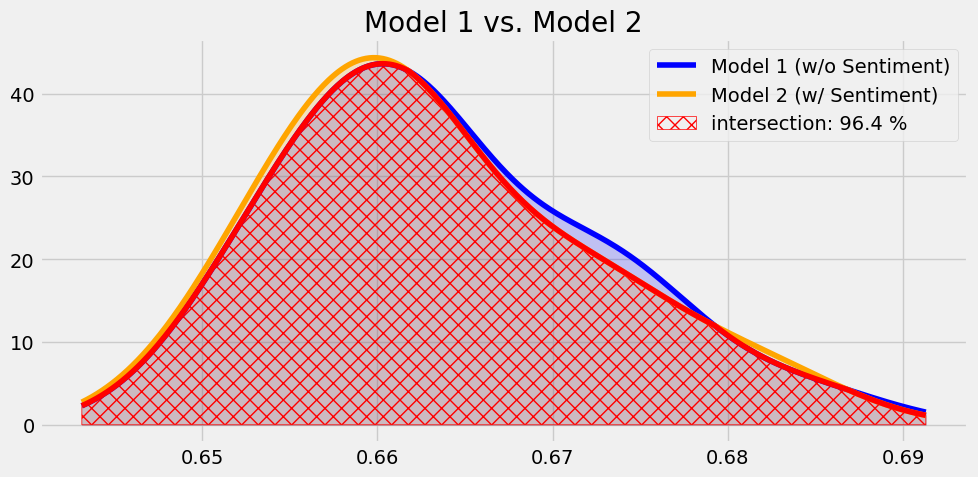

In [355]:
x0 = results_model1
x1 = results_model2

kde0 = gaussian_kde(x0)
kde1 = gaussian_kde(x1)

xmin = min(x0.min(), x1.min())
xmax = max(x0.max(), x1.max())
dx = 0.2 * (xmax - xmin) # add a 20% margin, as the kde is wider than the data
xmin -= dx
xmax += dx

x = np.linspace(xmin, xmax, 500)
kde0_x = kde0(x)
kde1_x = kde1(x)
inters_x = np.minimum(kde0_x, kde1_x)

plt.plot(x, kde0_x, color='b', label='Model 1 (w/o Sentiment)')
plt.fill_between(x, kde0_x, 0, color='b', alpha=0.2)
plt.plot(x, kde1_x, color='orange', label='Model 2 (w/ Sentiment)')
plt.fill_between(x, kde1_x, 0, color='orange', alpha=0.2)
plt.plot(x, inters_x, color='r')
plt.fill_between(x, inters_x, 0, facecolor='none', edgecolor='r', hatch='xx', label='intersection')

area_inters_x = np.trapz(inters_x, x)

handles, labels = plt.gca().get_legend_handles_labels()
labels[2] += f': {area_inters_x * 100:.1f} %'
plt.legend(handles, labels, title='')
plt.title('Model Score Results 1 vs. Model Score Results 2')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 100
plt.show()


## 4.2 5x2 CV Paired t-test

In [190]:
def five_two_statistic(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    p_hat = (p1 + p2) / 2
    s = (p1 - p_hat)**2 + (p2 - p_hat)**2
    t = p1[0] / np.sqrt(1/5. * sum(s))
    
    p_value = t_dist.sf(t, 5)*2
    
    return t, p_value

In [191]:
p_1 = []
p_2 = []

rng = np.random.RandomState(42)
for i in range(5):
    randint = rng.randint(low=0, high=32767)

    modell_1_final.fit(x_train_1, y_train_1)
    modell_2_final.fit(x_train_2, y_train_2)
    acc1 = f1_score(y_test_1, modell_1_final.predict(x_test_1))
    acc2 = f1_score(y_test_2, modell_2_final.predict(x_test_2))
    p_1.append(acc1 - acc2)

    modell_1_final.fit(x_test_1, y_test_1)
    modell_2_final.fit(x_test_2, y_test_2)
    acc1 = f1_score(y_train_1, modell_1_final.predict(x_train_1))
    acc2 = f1_score(y_train_2, modell_2_final.predict(x_train_2))
    p_2.append(acc1 - acc2)
# Running the test
print("5x2 CV Paired t-test")     
t, p = five_two_statistic(p_1, p_2)
print(f"t statistic: {t}, p-value: {p}\n")

5x2 CV Paired t-test
t statistic: 1.5052238069862447, p-value: 0.19260698185320604



## 4.3 Modellmetriken Modell 1 (ohne Sentiment)

### 4.3.1 Konfusionsmatrix

In [192]:
results_1 = x_test_1.copy()

results_1['trend'] = y_test_1
results_1['prediction'] = modell_1_final.predict(x_test_1)
results_1['probability'] = modell_1_final.predict_proba(x_test_1)[:,1]

Text(0.5, 13.779999999999973, 'Modellprognose')

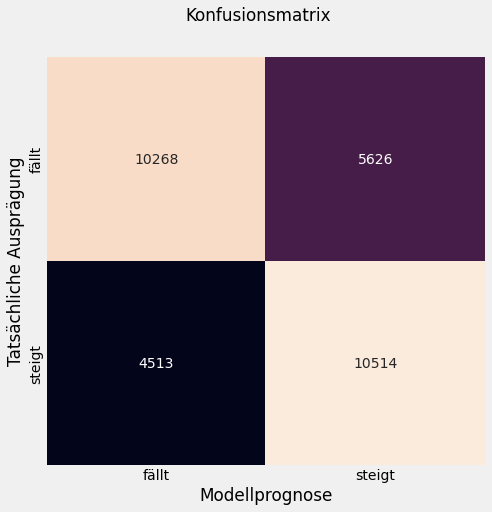

In [193]:
cm = confusion_matrix(results_1['trend'], results_1['prediction'])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, xticklabels=['fällt','steigt'], yticklabels = ['fällt','steigt'])
plt.suptitle('Konfusionsmatrix')
plt.ylabel('Tatsächliche Ausprägung')
plt.xlabel('Modellprognose')

In [194]:
print('Richtig Positiv (RP):', cm[1][1])
print('Falsch Positiv (FP):', cm[0][1])
print('Falsch Negativ (FN):', cm[1][0])
print('Richtig Negativ (RN):', cm[0][0])

Richtig Positiv (RP): 10514
Falsch Positiv (FP): 5626
Falsch Negativ (FN): 4513
Richtig Negativ (RN): 10268


### 4.3.2 Accuracy (Klassifikationsgenauigkeit)

In [195]:
accuracy = accuracy_score(results_1['trend'], results_1['prediction'])
print('Accuracy (Klassifikationsgenauigkeit):', accuracy)
print('{:.2%} der Trends werden richtig klassifiziert.'.format(accuracy))

Accuracy (Klassifikationsgenauigkeit): 0.6720998674040296
67.21% der Trends werden richtig klassifiziert.


### 4.3.3 Falschklassifikationsrate

In [196]:
falschklassifikationsrate = 1 - accuracy
print('Falschklassifikationsrate:', falschklassifikationsrate)
print('{:.2%} der Trends werden falsch klassifiziert.'.format(falschklassifikationsrate))

Falschklassifikationsrate: 0.3279001325959704
32.79% der Trends werden falsch klassifiziert.


### 4.3.4 Präzision (Precision)

In [197]:
precision = precision_score(results_1['trend'], results_1['prediction'])
print('Präzision (Precision):', precision)
print('Von den {0} prognostizierten Uptrends wurden {1:.2%}, also {2}, richtig klassifiziert.'.format((cm[1][1] + cm[0][1]), precision, cm[1][1]))

Präzision (Precision): 0.6514250309789343
Von den 16140 prognostizierten Uptrends wurden 65.14%, also 10514, richtig klassifiziert.


### 4.3.5 Sensitivität (Recall)

In [198]:
recall = recall_score(results_1['trend'], results_1['prediction'])
print('Sensitivität (Recall):', recall)
print('Von den {0} tatsächlich gestiegenen Uptrends wurden {1:.2%}, also {2}, richtig klassifiziert.'.format((cm[1][1] + cm[1][0]),recall,cm[1][1]))

Sensitivität (Recall): 0.6996739202768351
Von den 15027 tatsächlich gestiegenen Uptrends wurden 69.97%, also 10514, richtig klassifiziert.


### 4.3.6 F-Maß

In [199]:
fscore = 2 * precision * recall / (precision + recall)
print('F-Maß:', fscore)

F-Maß: 0.6746879712516444


### 4.3.7 Falsch-Positiv-Rate

In [200]:
false_positive_rate = (cm[0][1] / (cm[0][1] + cm[0][0]))
print('Falsch-positiv-Rate (false positive rate)):', false_positive_rate)
print('Von den {0} Downtrends wurden {1:.2%}, also {2} fälschlicherweise als Uptrend klassifiziert.'.format((cm[0][1] + cm[0][0]),false_positive_rate,cm[0][1]))

Falsch-positiv-Rate (false positive rate)): 0.3539700515917956
Von den 15894 Downtrends wurden 35.40%, also 5626 fälschlicherweise als Uptrend klassifiziert.


### 4.3.8 Area under the Curve (AUC) und Receiver Operating Characteristic (ROC)

AUC: 0.7331725087703171


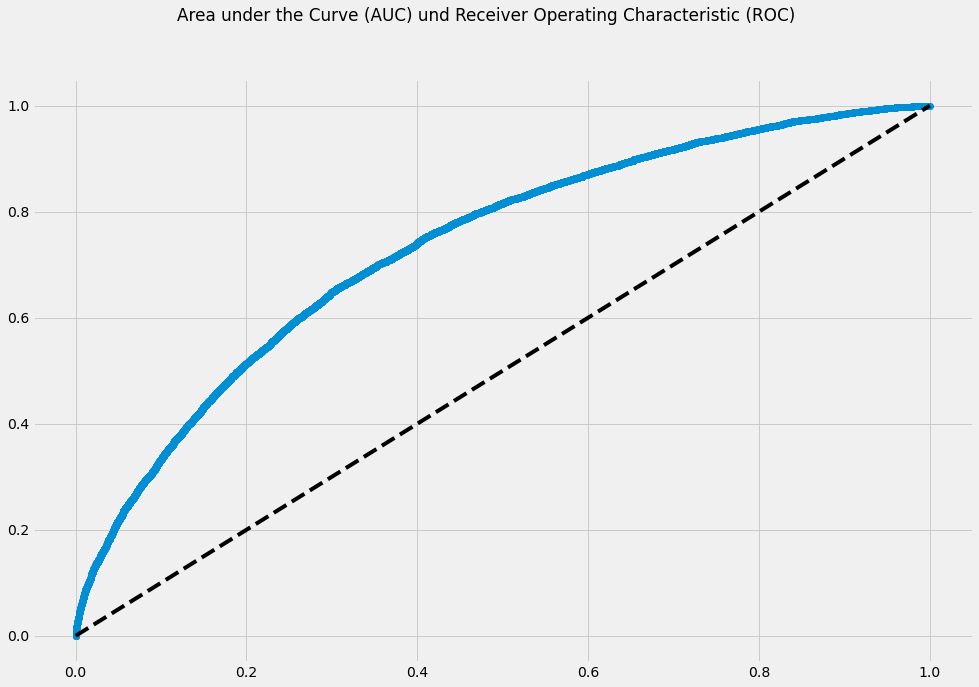

In [201]:
auc = roc_auc_score(results_1['trend'], results_1['probability'])
print('AUC:', auc)

fpr, tpr, thresholds = roc_curve(results_1['trend'], results_1['probability'])

plt.subplots(figsize=(15, 10))
plt.suptitle('Area under the Curve (AUC) und Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'o-', label="ROC-Kurve "+" "+"(AUC: %0.2f)" %auc, fillstyle='full')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), color = 'black', linestyle='dashed', label="AUC 0.5")

Feature ranking (Importance in percentage):
1. Close (73.97%)
2. Low (9.67%)
3. High (9.33%)
4. Open (3.24%)
5. Volume_USD (2.54%)
6. Weighted_Price (0.65%)
7. Volume_BTC (0.60%)


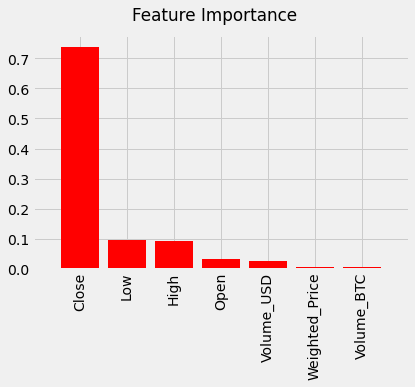

In [202]:
#Combine array of feature_importances_ and feature names
importances = sorted(list(zip(x_test_1.columns,modell_1_final.feature_importances_,range(x_test_1.shape[1]))),key=lambda tup: tup[1], reverse=True)

#Calculate the per feature standard deviation
std = np.std([modell_1_final.feature_importances_ for tree in modell_1_final.estimators_],
             axis=0)

#Transpose array
importances = pd.DataFrame(importances).T.values.tolist()

# Print the feature ranking
print("Feature ranking (Importance in percentage):")

for f in range(x_test_1.shape[1]):
    print("%d. %s (%.2f%%)" % (f + 1, importances[0][f], 100 * importances[1][f]))
    


# Plot the impurity-based feature importances of the forest
plt.figure()
plt.suptitle("Feature Importance")
plt.bar(range(x_test_1.shape[1]), importances[1],
        color="r", yerr=std, align="center")
plt.xticks(range(x_test_1.shape[1]), importances[0], rotation='vertical')
plt.xlim([-1, x_test_1.shape[1]])
plt.show()

In [203]:
print("Die 5 höchstbewerteten Feature Importances:\n", )
for feat in importances[0][:5]:
    print(feat)
print("\nIn Summe haben sie eine Wichtigkeit von {:.2%}".format(sum(importances[1][:5])))

Die 5 höchstbewerteten Feature Importances:

Close
Low
High
Open
Volume_USD

In Summe haben sie eine Wichtigkeit von 98.75%


## 4.4 Modellmetriken Modell 2 (mit Sentiment)

### 4.4.1 Konfusionsmatrix

In [204]:
results_2 = x_test_2.copy()

results_2['trend'] = y_test_2
results_2['prediction'] = modell_2_final.predict(x_test_2)
results_2['probability'] = modell_2_final.predict_proba(x_test_2)[:,1]

Text(0.5, 13.779999999999973, 'Modellprognose')

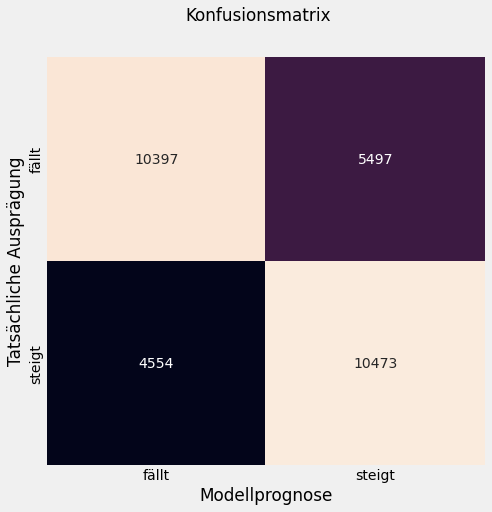

In [205]:
cm = confusion_matrix(results_2['trend'], results_2['prediction'])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, xticklabels=['fällt','steigt'], yticklabels = ['fällt','steigt'])
plt.suptitle('Konfusionsmatrix')
plt.ylabel('Tatsächliche Ausprägung')
plt.xlabel('Modellprognose')

In [206]:
print('Richtig Positiv (RP):', cm[1][1])
print('Falsch Positiv (FP):', cm[0][1])
print('Falsch Negativ (FN):', cm[1][0])
print('Richtig Negativ (RN):', cm[0][0])

Richtig Positiv (RP): 10473
Falsch Positiv (FP): 5497
Falsch Negativ (FN): 4554
Richtig Negativ (RN): 10397


### 4.3.2 Accuracy (Klassifikationsgenauigkeit)

In [207]:
accuracy = accuracy_score(results_2['trend'], results_2['prediction'])
print('Accuracy (Klassifikationsgenauigkeit):', accuracy)
print('{:.2%} der Tage werden richtig klassifiziert.'.format(accuracy))

Accuracy (Klassifikationsgenauigkeit): 0.6749458296950293
67.49% der Tage werden richtig klassifiziert.


### 4.3.3 Falschklassifikationsrate

In [208]:
falschklassifikationsrate = 1 - accuracy
print('Falschklassifikationsrate:', falschklassifikationsrate)
print('{:.2%} der Tage werden falsch klassifiziert.'.format(falschklassifikationsrate))

Falschklassifikationsrate: 0.32505417030497075
32.51% der Tage werden falsch klassifiziert.


### 4.3.4 Präzision (Precision)

In [209]:
precision = precision_score(results_2['trend'], results_2['prediction'])
print('Präzision (Precision):', precision)
print('Von den {0} prognostizierten Uptrend wurden {1:.2%}, also {2}, richtig klassifiziert.'.format((cm[1][1] + cm[0][1]), precision, cm[1][1]))

Präzision (Precision): 0.6557921102066374
Von den 15970 prognostizierten Uptrend wurden 65.58%, also 10473, richtig klassifiziert.


### 4.3.5 Sensitivität (Recall)

In [210]:
recall = recall_score(results_2['trend'], results_2['prediction'])
print('Sensitivität (Recall):', recall)
print('Von den {0} tatsächlich gestiegenen Uptrends wurden {1:.2%}, also {2}, richtig klassifiziert.'.format((cm[1][1] + cm[1][0]),recall,cm[1][1]))

Sensitivität (Recall): 0.6969454981034139
Von den 15027 tatsächlich gestiegenen Uptrends wurden 69.69%, also 10473, richtig klassifiziert.


### 4.3.6 F-Maß

In [211]:
fscore = 2 * precision * recall / (precision + recall)
print('F-Maß:', fscore)

F-Maß: 0.6757428138206922


### 4.3.7 Falsch-Positiv-Rate

In [212]:
false_positive_rate = (cm[0][1] / (cm[0][1] + cm[0][0]))
print('Falsch-positiv-Rate (false positive rate)):', false_positive_rate)
print('Von den {0} Downtrends wurden {1:.2%}, also {2} fälschlicherweise als Uptrend klassifiziert.'.format((cm[0][1] + cm[0][0]),false_positive_rate,cm[0][1]))

Falsch-positiv-Rate (false positive rate)): 0.34585378130111993
Von den 15894 Downtrends wurden 34.59%, also 5497 fälschlicherweise als Uptrend klassifiziert.


### 4.3.8 Area under the Curve (AUC) und Receiver Operating Characteristic (ROC)

AUC: 0.7376025804447511


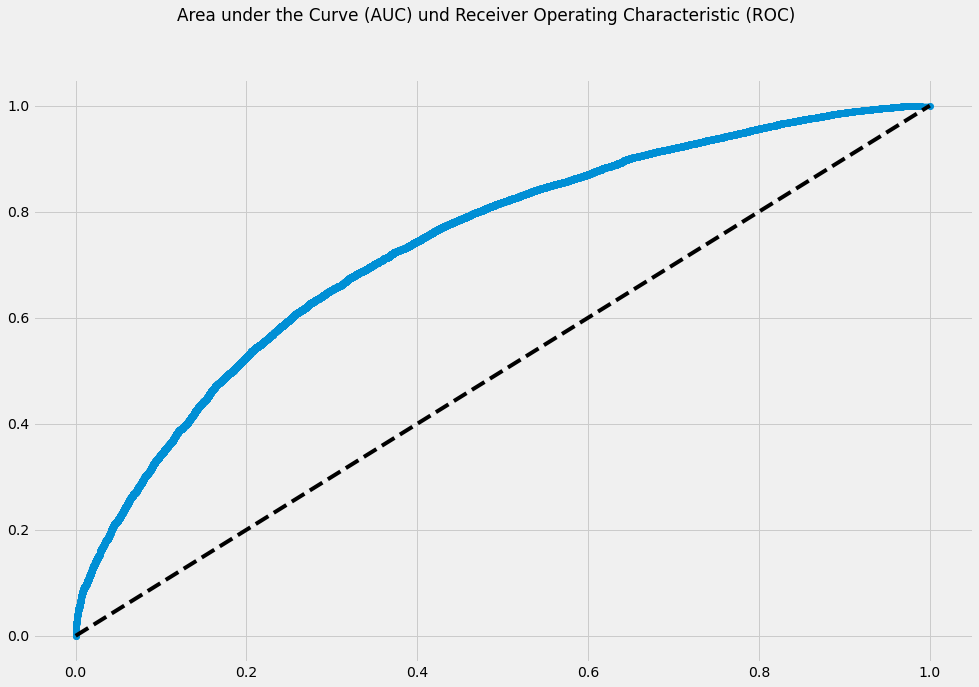

In [213]:
auc = roc_auc_score(results_2['trend'], results_2['probability'])
print('AUC:', auc)

fpr, tpr, thresholds = roc_curve(results_2['trend'], results_2['probability'])

plt.subplots(figsize=(15, 10))
plt.suptitle('Area under the Curve (AUC) und Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'o-', label="ROC-Kurve "+" "+"(AUC: %0.2f)" %auc, fillstyle='full')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), color = 'black', linestyle='dashed', label="AUC 0.5")

Feature ranking (Importance in percentage):
1. Close (58.27%)
2. Low (15.27%)
3. High (15.22%)
4. Open (5.36%)
5. Volume_USD (2.56%)
6. Volume_BTC (1.60%)
7. Weighted_Price (1.57%)
8. sentiment (0.15%)


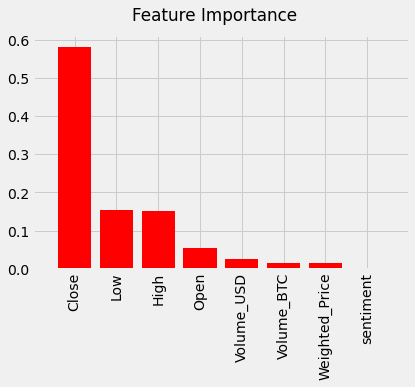

In [214]:
#Combine array of feature_importances_ and feature names
importances = sorted(list(zip(x_test_2.columns,modell_2_final.feature_importances_,range(x_test_2.shape[1]))),key=lambda tup: tup[1], reverse=True)

#Calculate the per feature standard deviation
std = np.std([modell_2_final.feature_importances_ for tree in modell_2_final.estimators_],
             axis=0)

#Transpose array
importances = pd.DataFrame(importances).T.values.tolist()

# Print the feature ranking
print("Feature ranking (Importance in percentage):")

for f in range(x_test_2.shape[1]):
    print("%d. %s (%.2f%%)" % (f + 1, importances[0][f], 100 * importances[1][f]))
    


# Plot the impurity-based feature importances of the forest
plt.figure()
plt.suptitle("Feature Importance")
plt.bar(range(x_test_2.shape[1]), importances[1],
        color="r", yerr=std, align="center")
plt.xticks(range(x_test_2.shape[1]), importances[0], rotation='vertical')
plt.xlim([-1, x_test_2.shape[1]])
plt.show()

In [215]:
print("Die 5 höchstbewerteten Feature Importances:\n", )
for feat in importances[0][:5]:
    print(feat)
print("\nIn Summe haben sie eine Wichtigkeit von {:.2%}".format(sum(importances[1][:5])))

Die 5 höchstbewerteten Feature Importances:

Close
Low
High
Open
Volume_USD

In Summe haben sie eine Wichtigkeit von 96.69%


### 4.3.9 Partial Dependence Plots

Computing partial dependence plots...
done in 4431.595s


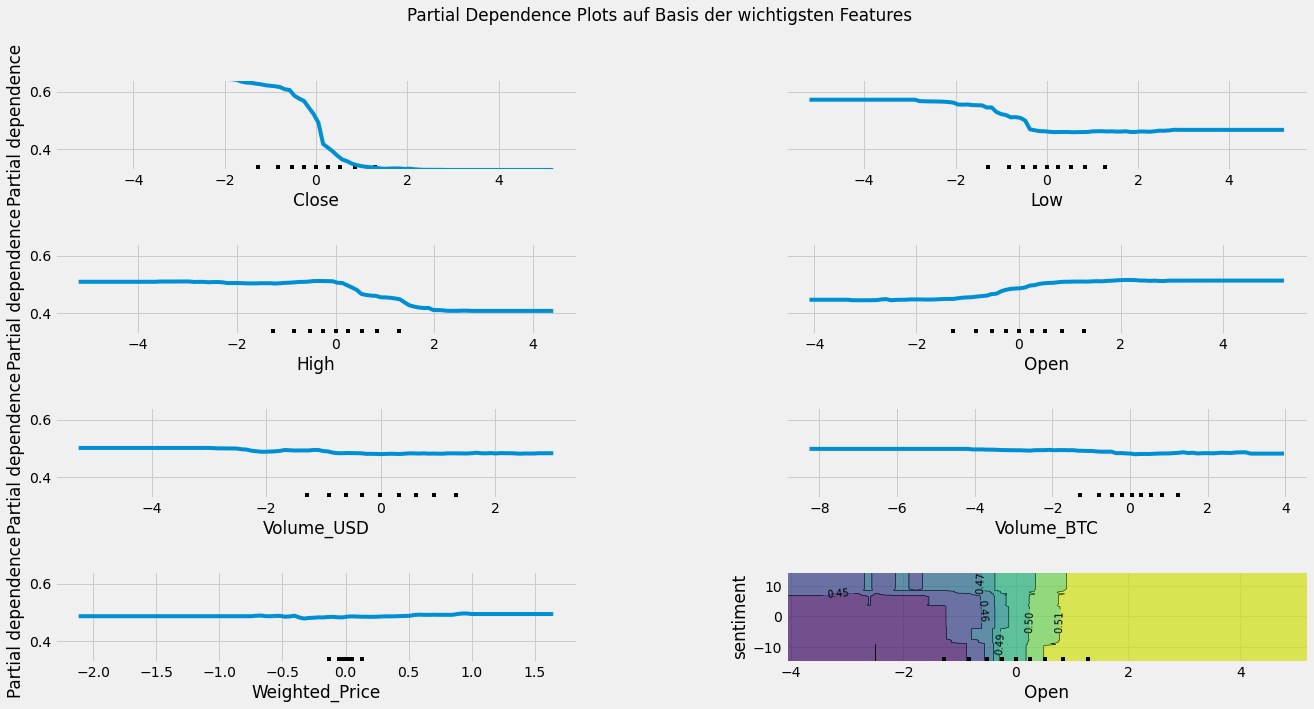

In [216]:
features = importances[0][:7] + [('Open', 'sentiment')]
print('Computing partial dependence plots...')
tic = time()
_, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))

with parallel_backend('loky', n_jobs=-1):
    display = plot_partial_dependence(
        modell_2_final, x_train_2, features, n_jobs=-1, grid_resolution=100,
        ax=ax, n_cols = 100, percentiles=(0, 1)
    )

print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial Dependence Plots auf Basis der wichtigsten Features'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.8)

## 4.4.0 SHAP (SHapley Additive exPlanations) Summary Plot

Wall time: 0 ns


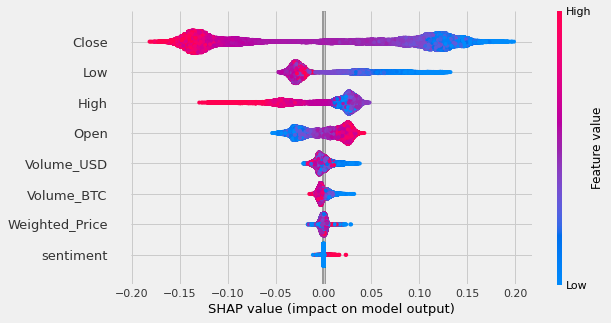

In [217]:
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = x_train_2

explainer = shap.TreeExplainer(modell_2_final)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

## 4.4.1 SHAP Waterfall Plot

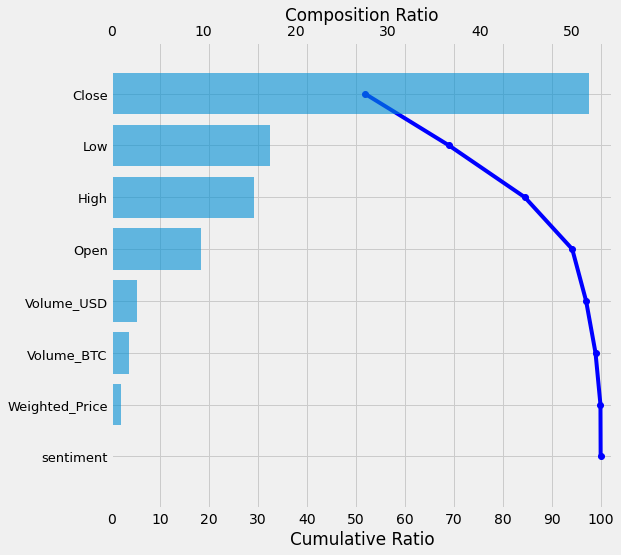

In [218]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))
    
    # Shap waterfall plot
make_shap_waterfall_plot(shap_values[1], samples)

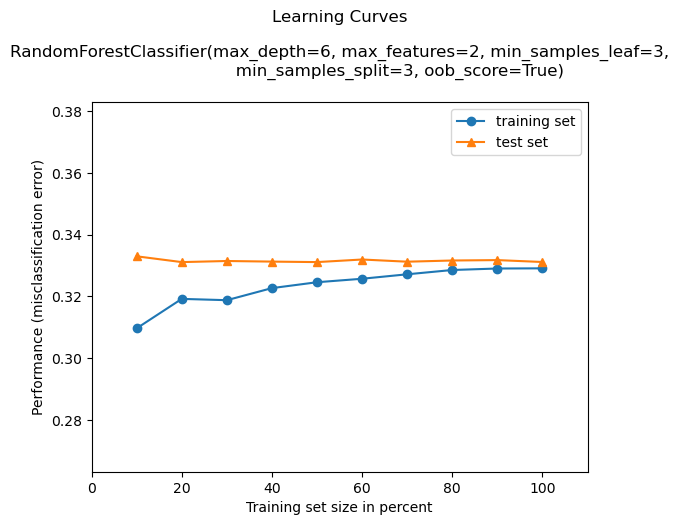

In [219]:
plot_learning_curves(x_train_2, y_train_2, x_test_2, y_test_2, modell_2_final)
plt.show()